<a href="https://colab.research.google.com/github/nick21aka/API.PY/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

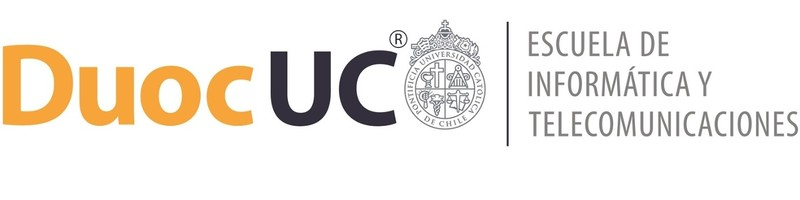

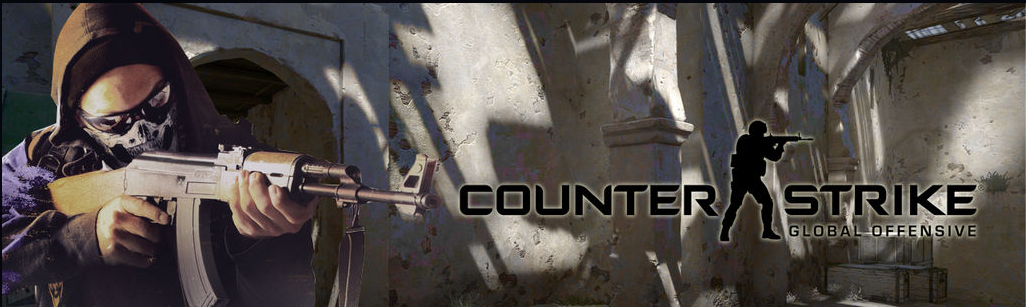

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
Nicolas Silva
Renato Vera

Docente:  Giocrisrai Godoy   

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, nos ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [42]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.


#instertar las librerias a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocesado y modelado
# =============================================================================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error




Cantidad de registros: 79,157 filas.

Cantidad de columnas: 30 columnas.

Variables:
Objetos (texto): Map, Team, RoundWinner, MatchWinner, TimeAlive, TravelledDistance, FirstKillTime.

Numéricas:

Enteros: muchos contadores como MatchKills, RoundKills, RLethalGrenadesThrown.

Booleanas: Survived, AbnormalMatch.

Algunos problemas: TimeAlive y TravelledDistance son tipo object cuando deberían ser números.



La industria de los videojuegos competitivos, Counter-Strike, genera una enorme cantidad de datos en cada partida: muertes, asistencias, compras de equipo, desplazamientos en el mapa, tiempos de supervivencia, entre otros.
Analizar estos datos es esencial para entender patrones de juego, optimizar estrategias de equipo, balancear el juego o incluso desarrollar sistemas automáticos de predicción de resultados.

El dataset entregado contiene información sobre eventos de rondas de partidas jugadas, permitiendo observar múltiples variables que influyen en el desempeño de los equipos y jugadores.

Queremos analizar datos de rondas de partidas FPS para construir modelos de predicción de desempeño de los jugadores, utilizando técnicas de machine learning (clasificación y regresión), luego de realizar transformaciones necesarias a los datos.
nuestra hipotesis es que arma es usada para hacer mas kills en la cantidad total de rondas








Objetivo de regresión: Predecir cuántas kills hará un jugador por kit de arma especifica.

objetivo de clasificacion: (roundkills) predecir si el jugador hace una buena ronda o no dependiendo de la cantidad de kills que haga.
Distribución de BuenaRonda:
BuenaRonda
0    75652 jugadores tuvieron menos de 2 kills por ronda.
1     3505 jugadores tuvieron mas de 2 kills por ronda.

## Fase 2: Data Understanding

In [43]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

#instertar las librerias a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocesado y modelado
# =============================================================================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [44]:
#cargar archivo base de datos del drive
pd.read_csv('/content/ET_demo_round_traces_2022.csv', sep=';')
df = pd.read_csv('/content/ET_demo_round_traces_2022.csv', sep=';')
df.head()

/tmp/ipython-input-44-164460568.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/ET_demo_round_traces_2022.csv', sep=';')
/tmp/ipython-input-44-164460568.py:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ET_demo_round_traces_2022.csv', sep=';')


Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

  RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0       False        True     False          False  ...          0   
1       False        True     False          False  ...          0   
2       False        True     False          False  ...          0   
3       False        True     False          False  ...          0   
4       False        True      True          False  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0               0                0                          750   
1            0               0                0                          800   
2            0               0                0                         1000   
3            0               0                0                          850   
4            0               0                0                         1000   

   TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                        4400           0                0             0   
1                        4400           0                0             0   
2                        4400           0                0             0   
3                        4400           0                0             0   
4                        4400           0                0             0   

  MatchHeadshots  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 30 columns]

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# 2. Identificar una columna con valores nulos
columnas_con_nulos = df.columns[df.isnull().any()]
print("Columnas con valores nulos:", columnas_con_nulos.tolist())



Columnas con valores nulos: ['Team', 'MatchWinner']


In [47]:
#conociendo los tipos de datos
#total de atributos encontrados en la fuente de datos
num_columnas = len(df.columns)
print("Número total de atributos en la fuente de datos es de:", num_columnas)
print("---------------------------------------------------------------------------------------------------------------------------")
#total de atributos categoricos
categorica = df.select_dtypes(include=['object']).columns.tolist()
num_categoricas = len(categorica)
print("Número total de atributos categoricos en la fuente de datos es de:", num_categoricas)
print("los nombres de los atributos categoricos son:", categorica)
print("---------------------------------------------------------------------------------------------------------------------------")
#total atributos numericos
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_numericas = len(num_cols)
print("Número total de atributos numericos en la fuente de datos es de:", num_numericas)
print("los nombres de los atributos numericos son:", num_cols)
print("---------------------------------------------------------------------------------------------------------------------------")
total_registros = df.shape[0]
print("El total de registros en la fuente de datos es de:", total_registros)


Número total de atributos en la fuente de datos es de: 30
---------------------------------------------------------------------------------------------------------------------------
Número total de atributos categoricos en la fuente de datos es de: 7
los nombres de los atributos categoricos son: ['Map', 'Team', 'RoundWinner', 'MatchWinner', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']
---------------------------------------------------------------------------------------------------------------------------
Número total de atributos numericos en la fuente de datos es de: 21
los nombres de los atributos numericos son: ['Unnamed: 0', 'InternalTeamId', 'MatchId', 'RoundId', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAss

In [48]:
#se describen el tipo de datos y su null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [49]:
#se obtiene el resumen estadistico de las tablas
df.describe()

Unnamed: 0  InternalTeamId       MatchId       RoundId  \
count   79157.000000    79157.000000  79157.000000  79157.000000   
mean    60570.193640        1.500006    250.525033     12.765517   
std     36436.598386        0.500003    149.557804      7.432837   
min       600.000000        1.000000      4.000000      1.000000   
25%     30830.000000        1.000000    128.000000      6.000000   
50%     56720.000000        2.000000    236.000000     12.000000   
75%     90639.000000        2.000000    373.000000     19.000000   
max    123779.000000        2.000000    511.000000     36.000000   

       RLethalGrenadesThrown  RNonLethalGrenadesThrown  PrimaryAssaultRifle  \
count           79157.000000              79157.000000         79157.000000   
mean                0.498667                  1.258057             0.675363   
std                 0.597985                  1.184909             0.464125   
min                 0.000000                  0.000000             0.000000   
25%                 0.000000                  0.000000             0.000000   
50%                 0.000000                  1.000000             1.000000   
75%                 1.000000                  2.000000             1.000000   
max                 4.000000                  6.000000             1.000000   

       PrimarySniperRifle  PrimaryHeavy    PrimarySMG  ...    RoundKills  \
count        79157.000000  79157.000000  79157.000000  ...  79157.000000   
mean             0.089840      0.005964      0.007046  ...      0.671349   
std              0.279797      0.075497      0.082453  ...      0.881798   
min              0.000000      0.000000      0.000000  ...      0.000000   
25%              0.000000      0.000000      0.000000  ...      0.000000   
50%              0.000000      0.000000      0.000000  ...      0.000000   
75%              0.000000      0.000000      0.000000  ...      1.000000   
max              1.000000      1.000000      1.000000  ...      5.000000   

       RoundAssists  RoundHeadshots  RoundFlankKills  \
count  79157.000000    79157.000000     79157.000000   
mean       0.146178        0.301553         0.095633   
std        0.385601        0.578843         0.320641   
min        0.000000        0.000000         0.000000   
25%        0.000000        0.000000         0.000000   
50%        0.000000        0.000000         0.000000   
75%        0.000000        0.000000         0.000000   
max        4.000000        5.000000         5.000000   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue    MatchKills  \
count                 79157.000000                79157.000000  79157.000000   
mean                   3778.108695                18890.133532      8.511578   
std                    2111.285406                 9743.203024      6.195079   
min                       0.000000                    0.000000      0.000000   
25%                    1600.000000                10900.000000      3.000000   
50%                    4700.000000                22550.000000      8.000000   
75%                    5200.000000                26050.000000     13.000000   
max                    8850.000000                36150.000000     41.000000   

       MatchFlankKills  MatchAssists  MatchHeadshots  
count     79157.000000  79157.000000    79157.000000  
mean          1.209912      1.874831        3.858484  
std           1.435150      1.824027        3.246752  
min           0.000000      0.000000        0.000000  
25%           0.000000      0.000000        1.000000  
50%           1.000000      1.000000        3.000000  
75%           2.000000      3.000000        6.000000  
max          11.000000     14.000000       22.000000  

[8 rows x 21 columns]

In [50]:
#identificamos las medias de posicion al calcular la mediana, moda, desviacion estandar
#media aritmetica, la varianza y datos unicos

numeric_df = df.select_dtypes(include=['number'])

print('mediana:', numeric_df.median())
print('---------------------------------------------------------------------------------------------------------------------------')
print('moda:', numeric_df.mode())
print('---------------------------------------------------------------------------------------------------------------------------')
print('desviacion estandar:', numeric_df.std())
print('---------------------------------------------------------------------------------------------------------------------------')
#media aritmetica x fila
numeric_df.mean(axis=1).head()
print('---------------------------------------------------------------------------------------------------------------------------')
print('varianza:', numeric_df.var())
print('---------------------------------------------------------------------------------------------------------------------------')
#datos unicos
for columna in df.columns:
  print('\nEstadistica de la columna {0}'.format(columna))
  print(df[columna].value_counts())
  print(df[columna].unique())

mediana: Unnamed: 0                     56720.0
InternalTeamId                     2.0
MatchId                          236.0
RoundId                           12.0
RLethalGrenadesThrown              0.0
RNonLethalGrenadesThrown           1.0
PrimaryAssaultRifle                1.0
PrimarySniperRifle                 0.0
PrimaryHeavy                       0.0
PrimarySMG                         0.0
PrimaryPistol                      0.0
RoundKills                         0.0
RoundAssists                       0.0
RoundHeadshots                     0.0
RoundFlankKills                    0.0
RoundStartingEquipmentValue     4700.0
TeamStartingEquipmentValue     22550.0
MatchKills                         8.0
MatchFlankKills                    1.0
MatchAssists                       1.0
MatchHeadshots                     3.0
dtype: float64
---------------------------------------------------------------------------------------------------------------------------
moda:        Unnamed: 0  Internal

In [51]:
import pandas as pd
#Crear objetivo de Clasificación: "BuenaRonda"
#Si hizo más de 2 kills en la ronda, es una buena ronda (1), si no (0)
df['BuenaRonda'] = df['RoundKills'].apply(lambda x: 1 if x > 2 else 0)


#Guardar el nuevo dataset
df.to_csv('ET_demo_round_traces_with_targets.csv', index=False)

print("Archivo guardado como 'ET_demo_round_traces_with_targets.csv' con los nuevos objetivos.")


Archivo guardado como 'ET_demo_round_traces_with_targets.csv' con los nuevos objetivos.


In [52]:
# Análisis de BuenaRonda
BuenaRonda_counts = df['BuenaRonda'].value_counts()
BuenaRonda_percentage = df['BuenaRonda'].value_counts(normalize=True) * 100

print("Distribución de BuenaRonda:")
print(BuenaRonda_counts)
print("\nPorcentaje de BuenaRonda:")
print(BuenaRonda_percentage)


Distribución de BuenaRonda:
BuenaRonda
0    75652
1     3505
Name: count, dtype: int64

Porcentaje de BuenaRonda:
BuenaRonda
0    95.572091
1     4.427909
Name: proportion, dtype: float64


Cuántas rondas fueron "buenas" (1) y cuántas "no buenas" (0).

El porcentaje de cada categoría.

In [53]:
# calcular la correlacion de solo las variables numericas.
correlacion = df.select_dtypes(include=['number']).corr()
print(correlacion)


                             Unnamed: 0  InternalTeamId   MatchId   RoundId  \
Unnamed: 0                     1.000000        0.000095  0.999979  0.003375   
InternalTeamId                 0.000095        1.000000  0.000027 -0.000008   
MatchId                        0.999979        0.000027  1.000000  0.001476   
RoundId                        0.003375       -0.000008  0.001476  1.000000   
RLethalGrenadesThrown          0.002911        0.039136  0.003009  0.065327   
RNonLethalGrenadesThrown      -0.009307       -0.005408 -0.009234  0.073314   
PrimaryAssaultRifle           -0.027305        0.001750 -0.027313  0.085892   
PrimarySniperRifle             0.043187        0.042205  0.043119  0.026291   
PrimaryHeavy                   0.003781        0.006337  0.003769 -0.003975   
PrimarySMG                     0.017790        0.004186  0.017847 -0.029860   
PrimaryPistol                 -0.002799       -0.032361 -0.002753 -0.107013   
RoundKills                     0.003284        0.033

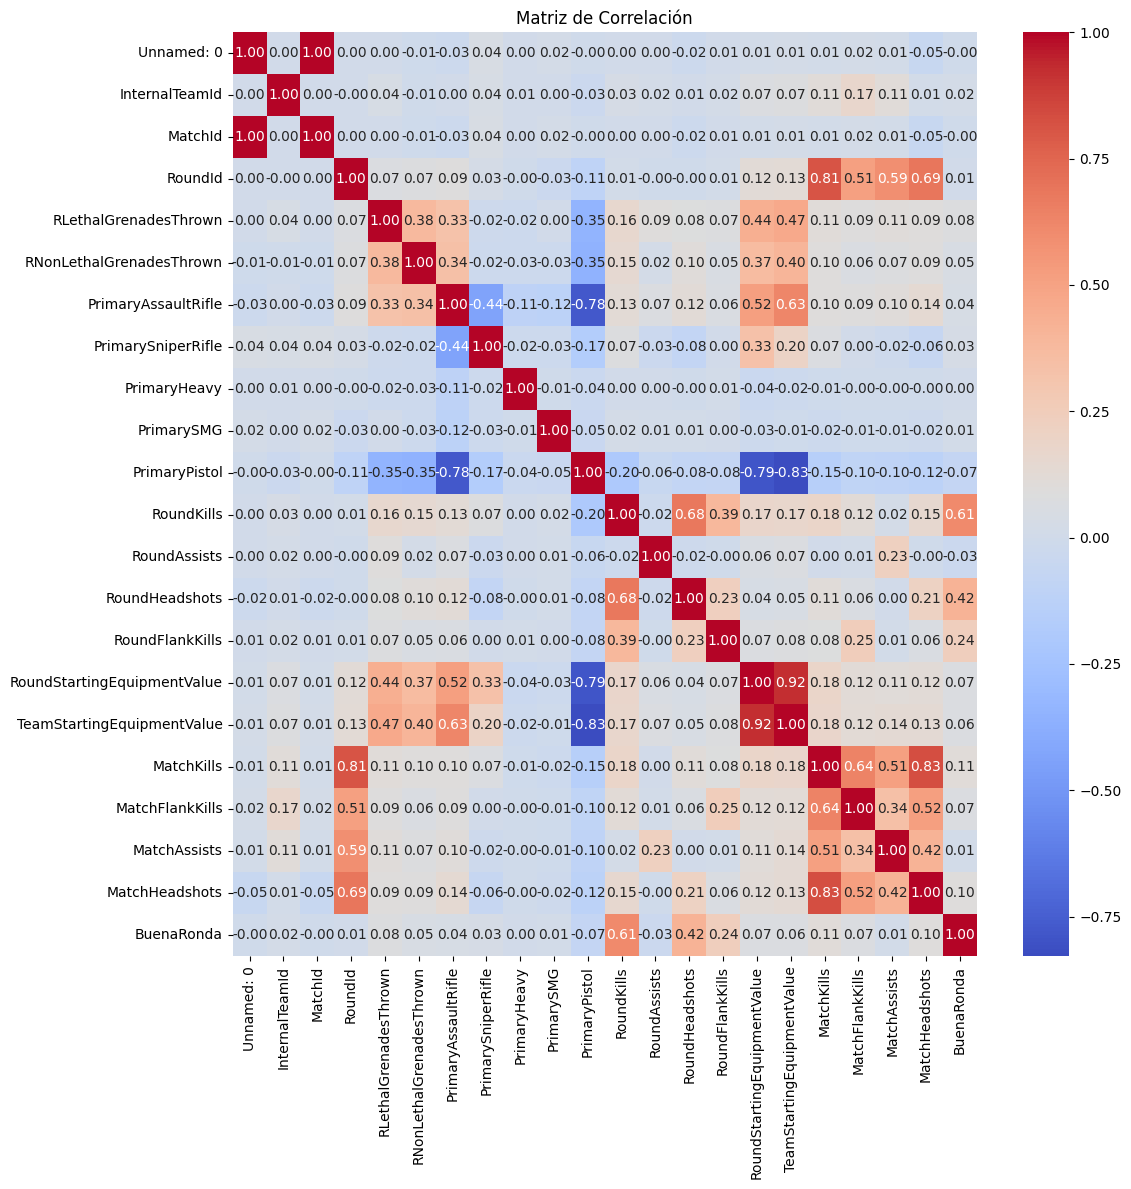

In [54]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


PrimaryPistol con PrimaryAssaultRifle = -0.78
Fuerte correlación negativa: si se usa una, no se usa la otra (son armas principales excluyentes).




In [55]:
filtered_df = df.select_dtypes(include=['number'])
filtered_df = df[['RoundKills','PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy', 'PrimaryPistol']]
#calcular que arma se utiliza mas por roundkills



In [56]:
# Filtrar solo las columnas relevantes
filtered_df = df[['RoundKills', 'PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy']]

# Sumar los RoundKills por tipo de arma
# Para eso, multiplicamos RoundKills por cada tipo de arma (suponiendo que cada columna de arma indica si fue usada o no, 0 o 1)
arma_kills = {}

for arma in ['PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy']:
    arma_kills[arma] = (filtered_df['RoundKills'] * filtered_df[arma]).sum()

# Convertir a DataFrame para verlo ordenado
arma_kills_df = pd.DataFrame.from_dict(arma_kills, orient='index', columns=['TotalKills'])
arma_kills_df = arma_kills_df.sort_values(by='TotalKills', ascending=False)

# Mostrar el arma más usada
arma_mas_usada = arma_kills_df.idxmax()

print("Arma más utilizada basada en RoundKills:")
print(arma_mas_usada)
print(arma_kills_df)




Arma más utilizada basada en RoundKills:
TotalKills    PrimaryAssaultRifle
dtype: object
                       TotalKills
PrimaryAssaultRifle  40033.643224
PrimarySniperRifle    6184.080882
PrimaryPistol         6117.000000
PrimarySMG             481.442606
PrimaryHeavy           325.833288


/tmp/ipython-input-57-3906471940.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arma_kills_df.index, y=arma_kills_df['TotalKills'], palette='Blues_d')


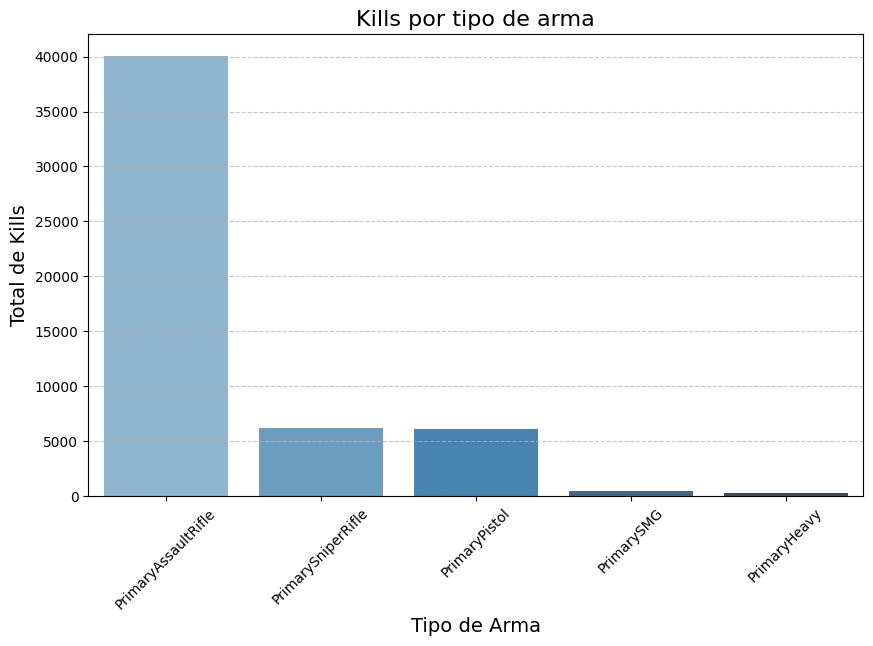

In [57]:
#3. **¿Ciertos tipos de armas primarias favorecen la mayoria de kills por ronda?**
#- Variable objetivo: `RoundKills`
#- Predictoras: `PrimaryRifle`, `PrimarySMG`, `Kills`, `HeadShots`


import matplotlib.pyplot as plt
import seaborn as sns

# Crear el bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=arma_kills_df.index, y=arma_kills_df['TotalKills'], palette='Blues_d')

# Estética del gráfico
plt.title('Kills por tipo de arma', fontsize=16)
plt.xlabel('Tipo de Arma', fontsize=14)
plt.ylabel('Total de Kills', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [59]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'BuenaRonda'],
      dtype='object')

In [60]:
X = df[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'Team', 'Map']]
y = df['RoundKills']

X = pd.get_dummies(X)  # Convertir categóricas a numéricas



In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [63]:
y_pred = model.predict(X_test)


In [64]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.7710179391182668


## Fase 3: Data Preparation

In [65]:
df2 = df.copy()
df2



Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner MatchWinner  Survived  AbnormalMatch  ...  \
0            1       False        True     False          False  ...   
1            1       False        True     False          False  ...   
2            1       False        True     False          False  ...   
3            1       False        True     False          False  ...   
4            1       False        True      True          False  ...   
...        ...         ...         ...       ...            ...  ...   
79152        5       False       False     False          False  ...   
79153        5       False       False     False          False  ...   
79154        5       False       False     False          False  ...   
79155        5       False       False     False          False  ...   
79156        5       False       False      True          False  ...   

      RoundAssists RoundHeadshots  RoundFlankKills  \
0                0              0                0   
1                0              0                0   
2                0              0                0   
3                0              0                0   
4                0              0                0   
...            ...            ...              ...   
79152            0              0                0   
79153            0              1                0   
79154            0              0                0   
79155            0              0                0   
79156            0              2                0   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                              750                        4400           0   
1                              800                        4400           0   
2                             1000                        4400           0   
3                              850                        4400           0   
4                             1000                        4400           0   
...                            ...                         ...         ...   
79152                         5600                       27100           4   
79153                         5500                       27100           8   
79154                         4950                       27100           5   
79155                         4950                       27100           1   
79156                         6100                       27100           5   

       MatchFlankKills  MatchAssists  MatchHeadshots BuenaRonda  
0                    0             0               0          0  
1                    0             0               0          0  
2                    0             0               0          0  
3                    0             0               0          0  
4                    0             0               0          0  
...                ...           ...             ...        ...  
79152                0             2               2          0  
79153                5             1               3          0  
79154                0             2             

In [66]:
#transformacion de datos
df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
df2.Team.replace({"CounterTerrorist":0,"Terrorist":1}, inplace=True)
df2.head()


/tmp/ipython-input-66-3304628547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
/tmp/ipython-input-66-3304628547.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.Map.replace({"de_inferno":1,"de_mirage"

Unnamed: 0  Map  Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0         600    1   1.0               1        4        1       False   
1         601    1   1.0               1        4        1       False   
2         602    1   1.0               1        4        1       False   
3         603    1   1.0               1        4        1       False   
4         604    1   1.0               1        4        1       False   

  MatchWinner  Survived  AbnormalMatch  ... RoundAssists RoundHeadshots  \
0        True     False          False  ...            0              0   
1        True     False          False  ...            0              0   
2        True     False          False  ...            0              0   
3        True     False          False  ...            0              0   
4        True      True          False  ...            0              0   

   RoundFlankKills  RoundStartingEquipmentValue  TeamStartingEquipmentValue  \
0                0                          750                        4400   
1                0                          800                        4400   
2                0                         1000                        4400   
3                0                          850                        4400   
4                0                         1000                        4400   

   MatchKills  MatchFlankKills  MatchAssists  MatchHeadshots BuenaRonda  
0           0                0             0               0          0  
1           0                0             0               0          0  
2           0                0             0               0          0  
3           0                0             0               0          0  
4           0                0             0               0          0  

[5 rows x 31 columns]

In [67]:


# Imprimir los nombres de las columnas categóricas
print("Columnas categóricas para transformar a enteros:")
print(categorica)

# Mostrar el DataFrame después de la transformación (ya realizada en el código anterior)
print("\nDataFrame después de la transformación:")
print(df2.head())


Columnas categóricas para transformar a enteros:
['Map', 'Team', 'RoundWinner', 'MatchWinner', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']

DataFrame después de la transformación:
   Unnamed: 0  Map  Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0         600    1   1.0               1        4        1       False   
1         601    1   1.0               1        4        1       False   
2         602    1   1.0               1        4        1       False   
3         603    1   1.0               1        4        1       False   
4         604    1   1.0               1        4        1       False   

  MatchWinner  Survived  AbnormalMatch  ... RoundAssists RoundHeadshots  \
0        True     False          False  ...            0              0   
1        True     False          False  ...            0              0   
2        True     False          False  ...            0              0   
3        True     False          False  ...            0            

In [68]:
# transformacion de datos
df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
df2.Team.replace({"CounterTerrorist":0,"Terrorist":1}, inplace=True)



In [69]:
import pandas as pd

# transformacion de datos
df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
df2.Team.replace({"CounterTerrorist":0,"Terrorist":1}, inplace=True)


df2['RoundWinner'].replace({'False4': 0, 'True4': 1, 'False': 0, 'True': 1}, inplace=True) # Add other problematic values found

df2['RoundWinner'] = df2['RoundWinner'].fillna(0).astype(int)

df2['TimeAlive'] = pd.to_numeric(df2['TimeAlive'], errors='coerce')

df2['TimeAlive'] = df2['TimeAlive'].fillna(0.0)

df2['TravelledDistance'] = pd.to_numeric(df2['TravelledDistance'], errors='coerce')

df2['TravelledDistance'] = df2['TravelledDistance'].fillna(0.0)

df2['MatchWinner'] = df2['MatchWinner'].fillna(0).astype(int)

df2['FirstKillTime'] = pd.to_numeric(df2['FirstKillTime'], errors='coerce')
df2['FirstKillTime'] = df2['FirstKillTime'].fillna(0.0)


df2.info()

/tmp/ipython-input-69-2708369303.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['RoundWinner'].replace({'False4': 0, 'True4': 1, 'False': 0, 'True': 1}, inplace=True) # Add other problematic values found


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  int64  
 2   Team                         79155 non-null  float64
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  int64  
 7   MatchWinner                  79157 non-null  int64  
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  float64
 11  TravelledDistance            79157 non-null  float64
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [70]:
df2['RoundWinner'] = df2['RoundWinner'].astype(int)
df2['MatchWinner'] = df2['MatchWinner'].astype(int)
df2['TimeAlive'] = df2['TimeAlive'].astype(float)
df2['TravelledDistance'] = df2['TravelledDistance'].astype(float)
df2['FirstKillTime'] = df2['FirstKillTime'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  int64  
 2   Team                         79155 non-null  float64
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  int64  
 7   MatchWinner                  79157 non-null  int64  
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  float64
 11  TravelledDistance            79157 non-null  float64
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [71]:
# Convertir a float y luego a int (esto redondea hacia abajo)
df2['TimeAlive_int'] = df2['TimeAlive'].astype(float).astype(int)


In [72]:
df2['TimeAlive_int'] = df2['TimeAlive'].astype(float).round().astype(int)


In [73]:
df1 = df2 ['TimeAlive_int']
df1

0        0
1        0
2        0
3        0
4        0
        ..
79152    0
79153    0
79154    0
79155    0
79156    0
Name: TimeAlive_int, Length: 79157, dtype: int64

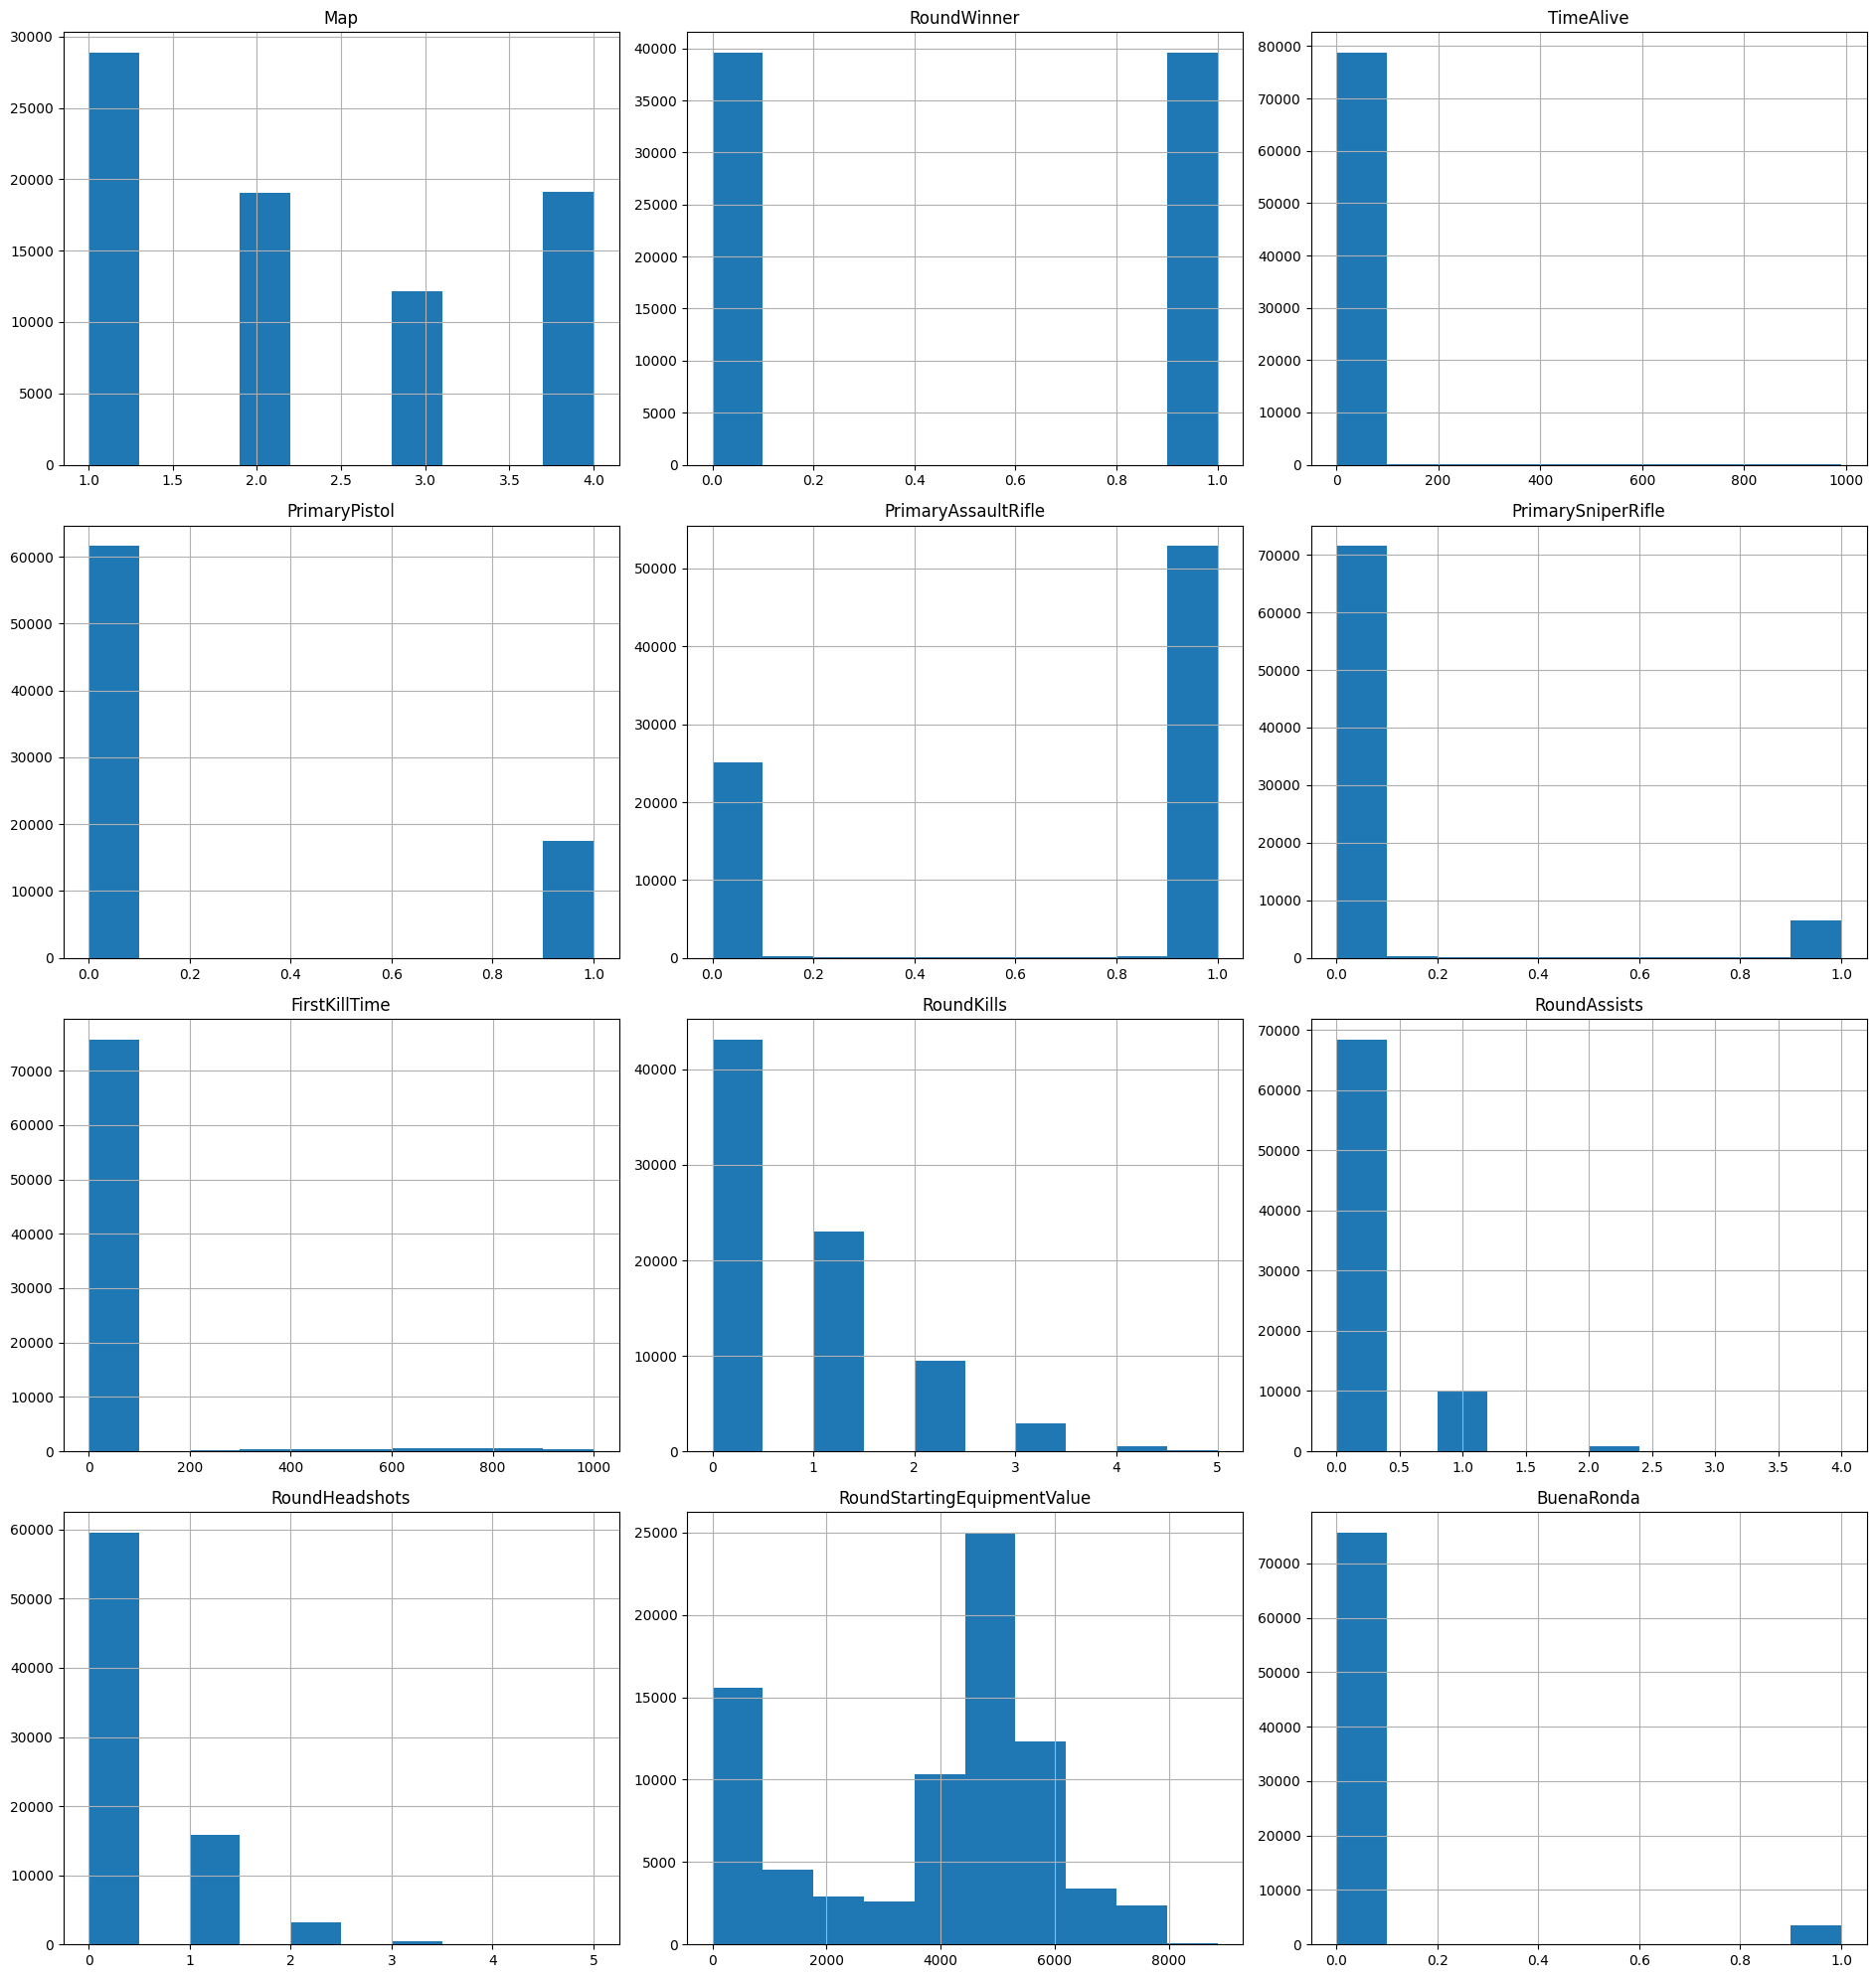

In [74]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.
import matplotlib.pyplot as plt
#crear una copia de data_frame para la limpieza

#seleccionar las variables numericas
variables_numericas = ['Map', 'RoundWinner', 'Survived',
                       'TimeAlive', 'PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'FirstKillTime', 'RoundKills',
                       'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'BuenaRonda']



#eliminar las variables no deseadas del dataframe
data_frame_filtrado = df2.drop(['Team', 'MatchWinner'], axis=1)

#generar histogramas para las variables restantes
data_frame_filtrado[variables_numericas].hist(figsize=(19, 20))
plt.tight_layout()
plt.show()

GRAFICOS EN DONDE SE MUESTRAN LAS ID DE FORMA INDEPENDIENTE Y LOS RESULTADOS DE LOS MOVIMIENTOS DE  CADA JUGADOR
RLehalGrenadesThrown indica	Cuántas granadas letales lanzó un jugador en una ronda. Casi siempre entre 0 y 2 granadas.
PrimaryAssaultRifle Indica si el arma principal era un rifle de asalto, Muchos jugadores sí usan rifles.
RoundKills	indica Cuántas kills consiguió un jugador en una ronda. La mayoría consigue 0-1 kills por ronda.

In [75]:
correlacion1= df2.select_dtypes(include=['number']).corr()
print(correlacion)

                             Unnamed: 0  InternalTeamId   MatchId   RoundId  \
Unnamed: 0                     1.000000        0.000095  0.999979  0.003375   
InternalTeamId                 0.000095        1.000000  0.000027 -0.000008   
MatchId                        0.999979        0.000027  1.000000  0.001476   
RoundId                        0.003375       -0.000008  0.001476  1.000000   
RLethalGrenadesThrown          0.002911        0.039136  0.003009  0.065327   
RNonLethalGrenadesThrown      -0.009307       -0.005408 -0.009234  0.073314   
PrimaryAssaultRifle           -0.027305        0.001750 -0.027313  0.085892   
PrimarySniperRifle             0.043187        0.042205  0.043119  0.026291   
PrimaryHeavy                   0.003781        0.006337  0.003769 -0.003975   
PrimarySMG                     0.017790        0.004186  0.017847 -0.029860   
PrimaryPistol                 -0.002799       -0.032361 -0.002753 -0.107013   
RoundKills                     0.003284        0.033

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  int64  
 2   Team                         79155 non-null  float64
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  int64  
 7   MatchWinner                  79157 non-null  int64  
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  float64
 11  TravelledDistance            79157 non-null  float64
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [77]:
df1 = df2 ['TimeAlive']
df1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
79152    0.0
79153    0.0
79154    0.0
79155    0.0
79156    0.0
Name: TimeAlive, Length: 79157, dtype: float64

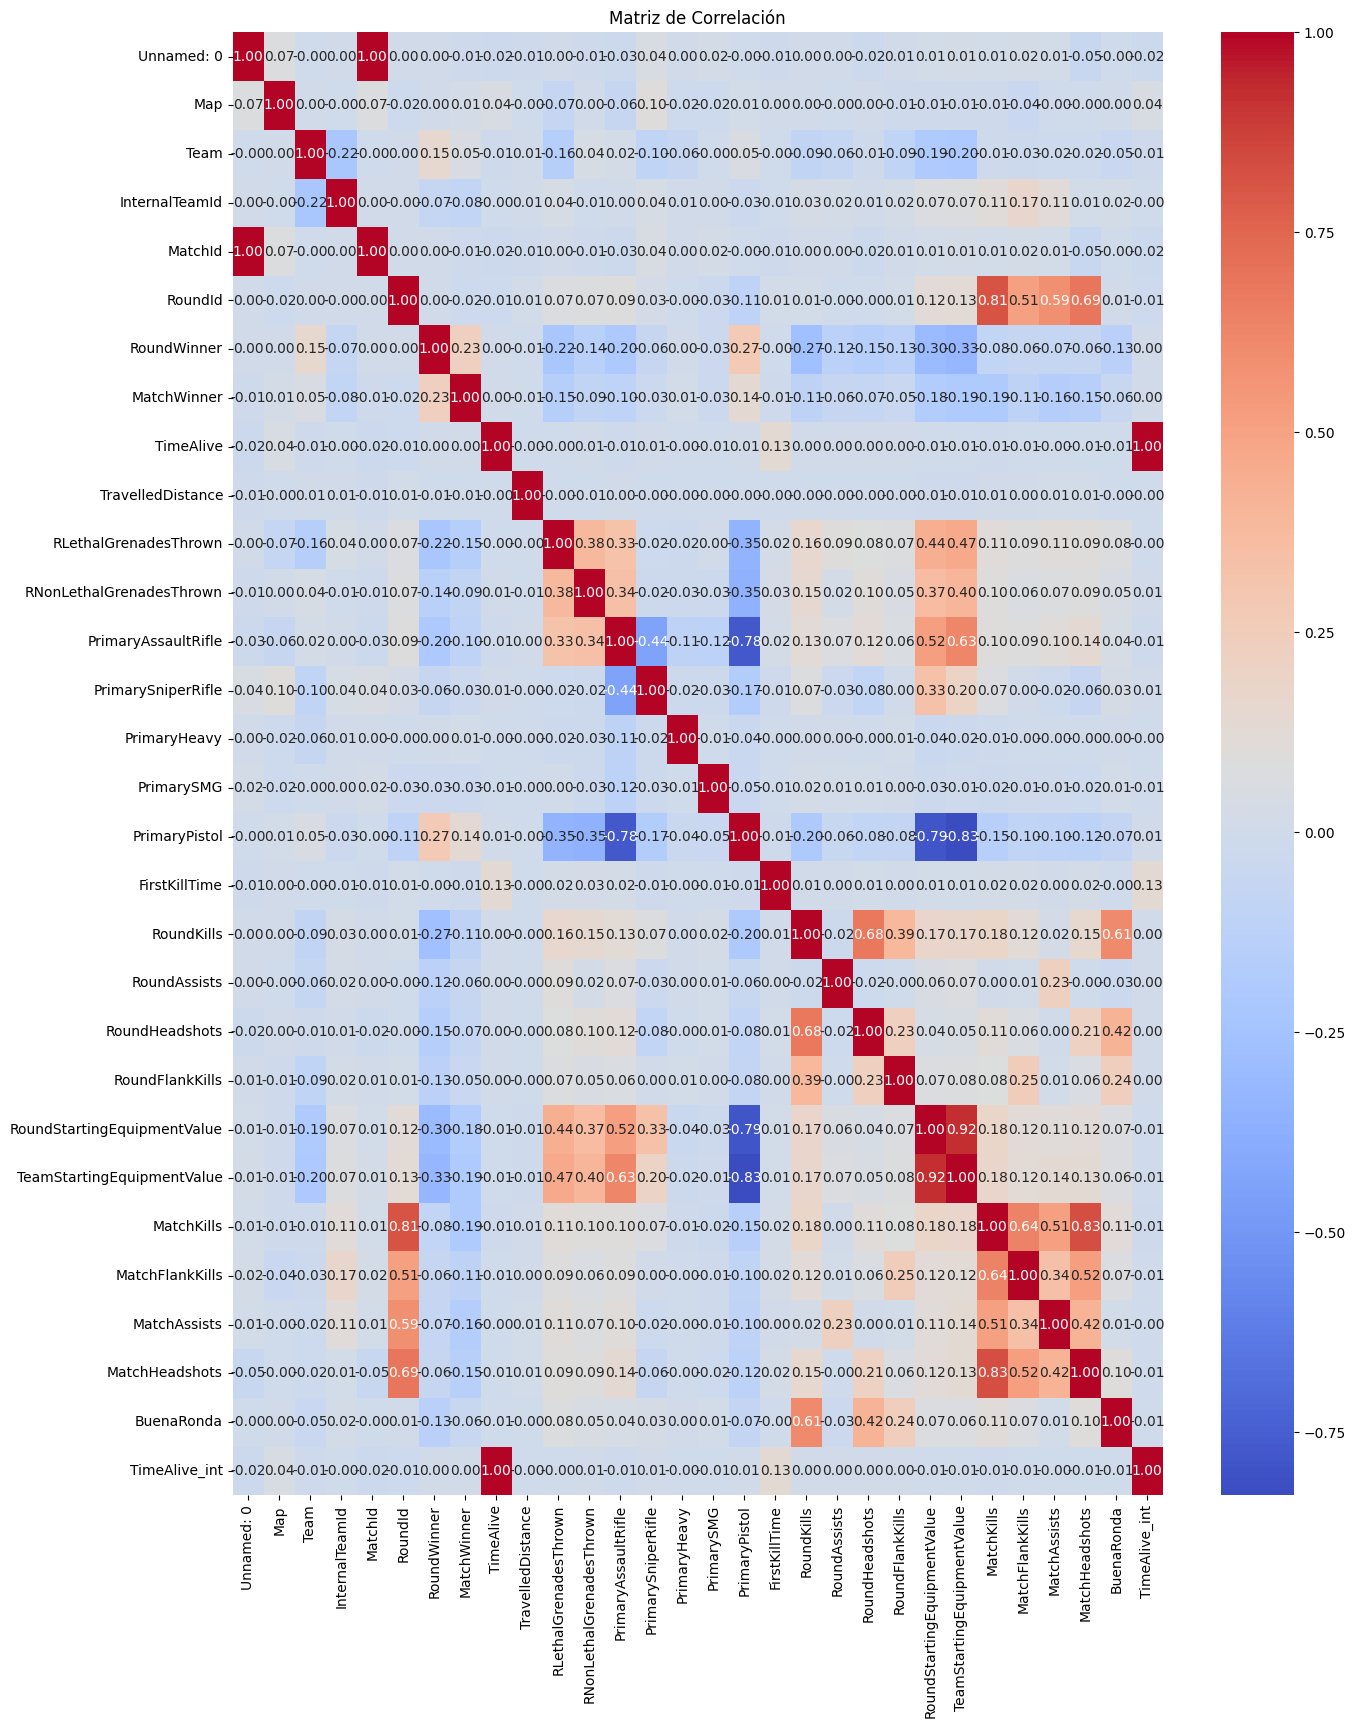

In [78]:
plt.figure(figsize=(15, 19))
sns.heatmap(correlacion1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


correlacion mas limpia del df2

In [79]:
df2

Unnamed: 0  Map  Team  InternalTeamId  MatchId  RoundId  RoundWinner  \
0             600    1   1.0               1        4        1            0   
1             601    1   1.0               1        4        1            0   
2             602    1   1.0               1        4        1            0   
3             603    1   1.0               1        4        1            0   
4             604    1   1.0               1        4        1            0   
...           ...  ...   ...             ...      ...      ...          ...   
79152      123775    2   0.0               2      511        5            0   
79153      123776    2   0.0               2      511        5            0   
79154      123777    2   0.0               2      511        5            0   
79155      123778    2   0.0               2      511        5            0   
79156      123779    2   0.0               2      511        5            0   

       MatchWinner  Survived  AbnormalMatch  ...  RoundHeadshots  \
0                1     False          False  ...               0   
1                1     False          False  ...               0   
2                1     False          False  ...               0   
3                1     False          False  ...               0   
4                1      True          False  ...               0   
...            ...       ...            ...  ...             ...   
79152            0     False          False  ...               0   
79153            0     False          False  ...               1   
79154            0     False          False  ...               0   
79155            0     False          False  ...               0   
79156            0      True          False  ...               2   

       RoundFlankKills  RoundStartingEquipmentValue  \
0                    0                          750   
1                    0                          800   
2                    0                         1000   
3                    0                          850   
4                    0                         1000   
...                ...                          ...   
79152                0                         5600   
79153                0                         5500   
79154                0                         4950   
79155                0                         4950   
79156                0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             0   
...                           ...         ...              ...           ...   
79152                       27100           4                0             2   
79153                       27100           8                5             1   
79154                       27100           5                0             2   
79155                       27100           1                0             1   
79156                       27100           5                1             1   

       MatchHeadshots  BuenaRonda  TimeAlive_int  
0                   0           0              0  
1                   0           0              0  
2                   0           0              0  
3                   0           0              0  
4                   0           0              0  
...               ...         ...            ...  
79152               2           0              0  
79153               3           0              0  
79154               3           0              0  
79155               0           0              0  
79156               2           1              0  

[79157

In [80]:
df2['MatchWinner'] = df2['MatchWinner'].astype(int)
df2['RoundWinner'] = df2['RoundWinner'].astype(int)

In [81]:
#filtrado para tener un mejor modelo donde se agruparan y cambiaran los nombres de la variables para
#una mejor interpretacion



filtrado = df2.groupby(['MatchId', 'Team', 'Map']).size().reset_index(name='count')
print(filtrado.head())
filtrado['GanarPartida'] = df2.groupby(['MatchId','Team','Map'])['MatchWinner'].first().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotaldeRondas'] = df2.groupby(['MatchId','Team','Map'])['RoundId'].nunique().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['KillsporRonda'] = df2.groupby(['MatchId','Team','Map'])['RoundKills'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['AssistenciaporRonda'] = df2.groupby(['MatchId','Team','Map'])['RoundAssists'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['ValorEquipamientoEquipo'] = df2.groupby(['MatchId','Team','Map'])['TeamStartingEquipmentValue'].first().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotalGranadasLanzadas'] = df2.groupby(['MatchId','Team','Map'])['RLethalGrenadesThrown'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotalGranadasNoLanzadas'] = df2.groupby(['MatchId','Team','Map'])['RNonLethalGrenadesThrown'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotalDeGranadas'] = filtrado['TotalGranadasLanzadas'] + filtrado['TotalGranadasNoLanzadas']


filtrado


   MatchId  Team  Map  count
0        4   0.0    1    114
1        4   1.0    1    114
2        6   0.0    3     67
3        6   1.0    3     92
4        9   0.0    1    125


MatchId  Team  Map  count  GanarPartida  TotaldeRondas  KillsporRonda  \
0          4   0.0    1    114             0             23            100   
1          4   1.0    1    114             1             23             50   
2          6   0.0    3     67             0             16              8   
3          6   1.0    3     92             1             16             19   
4          9   0.0    1    125             1             25            101   
..       ...   ...  ...    ...           ...            ...            ...   
661      509   1.0    3    135             1             27            114   
662      510   0.0    1    150             0             30            122   
663      510   1.0    1    150             0             30             71   
664      511   0.0    2     25             0              5             23   
665      511   1.0    2     25             1              5             12   

     AssistenciaporRonda  ValorEquipamientoEquipo  TotalGranadasLanzadas  \
0                     19                     3750                     71   
1                      6                     4400                     33   
2                      1                    25400                      1   
3                      0                     9000                      3   
4                     19                     4100                     94   
..                   ...                      ...                    ...   
661                   23                     4450                     77   
662                   29                     3550                    117   
663                   18                     4350                     58   
664                    7                     4100                     14   
665                    2                     3550                      1   

     TotalGranadasNoLanzadas  TotalDeGranadas  
0                        173              244  
1                        131              164  
2                          3                4  
3                          6                9  
4                        172              266  
..                       ...              ...  
661                      166              243  
662                      236              353  
663                      215              273  
664                       11               25  
665                       12               13  

[666 rows x 12 columns]

In [82]:
filtrado = filtrado[['MatchId','Team','GanarPartida','KillsporRonda',
                           'ValorEquipamientoEquipo','TotalDeGranadas', 'TotaldeRondas']]

filtrado

MatchId  Team  GanarPartida  KillsporRonda  ValorEquipamientoEquipo  \
0          4   0.0             0            100                     3750   
1          4   1.0             1             50                     4400   
2          6   0.0             0              8                    25400   
3          6   1.0             1             19                     9000   
4          9   0.0             1            101                     4100   
..       ...   ...           ...            ...                      ...   
661      509   1.0             1            114                     4450   
662      510   0.0             0            122                     3550   
663      510   1.0             0             71                     4350   
664      511   0.0             0             23                     4100   
665      511   1.0             1             12                     3550   

     TotalDeGranadas  TotaldeRondas  
0                244             23  
1                164             23  
2                  4             16  
3                  9             16  
4                266             25  
..               ...            ...  
661              243             27  
662              353             30  
663              273             30  
664               25              5  
665               13              5  

[666 rows x 7 columns]

In [83]:
filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MatchId                  666 non-null    int64  
 1   Team                     666 non-null    float64
 2   GanarPartida             666 non-null    int64  
 3   KillsporRonda            666 non-null    int64  
 4   ValorEquipamientoEquipo  666 non-null    int64  
 5   TotalDeGranadas          666 non-null    int64  
 6   TotaldeRondas            666 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 36.6 KB


In [84]:
missing_values = filtrado.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
MatchId                    0
Team                       0
GanarPartida               0
KillsporRonda              0
ValorEquipamientoEquipo    0
TotalDeGranadas            0
TotaldeRondas              0
dtype: int64


In [85]:
for columna in filtrado.columns:
  print('\nEstadistica de la columna {0}'.format(columna))
  print(filtrado[columna].describe())


Estadistica de la columna MatchId
count    666.000000
mean     250.741742
std      150.874780
min        4.000000
25%      128.000000
50%      235.000000
75%      374.000000
max      511.000000
Name: MatchId, dtype: float64

Estadistica de la columna Team
count    666.000000
mean       0.500000
std        0.500376
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Team, dtype: float64

Estadistica de la columna GanarPartida
count    666.000000
mean       0.474474
std        0.499723
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: GanarPartida, dtype: float64

Estadistica de la columna KillsporRonda
count    666.000000
mean      79.791291
std       22.070768
min        6.000000
25%       66.000000
50%       78.000000
75%       94.000000
max      136.000000
Name: KillsporRonda, dtype: float64

Estadistica de la columna ValorEquipamientoEquipo
count      666.000000
mean      7


Matriz de Correlación del DataFrame Filtrado:
                              MatchId          Team  GanarPartida  \
MatchId                  1.000000e+00  2.830646e-18     -0.013092   
Team                     2.830646e-18  1.000000e+00      0.102235   
GanarPartida            -1.309165e-02  1.022354e-01      1.000000   
KillsporRonda            1.033107e-02 -4.136004e-01     -0.181206   
ValorEquipamientoEquipo  1.477399e-02 -6.112854e-02     -0.245763   
TotalDeGranadas         -2.143125e-02 -8.355973e-02     -0.199218   
TotaldeRondas           -8.123288e-03  0.000000e+00     -0.059367   

                         KillsporRonda  ValorEquipamientoEquipo  \
MatchId                       0.010331                 0.014774   
Team                         -0.413600                -0.061129   
GanarPartida                 -0.181206                -0.245763   
KillsporRonda                 1.000000                 0.082478   
ValorEquipamientoEquipo       0.082478                 1.000000  

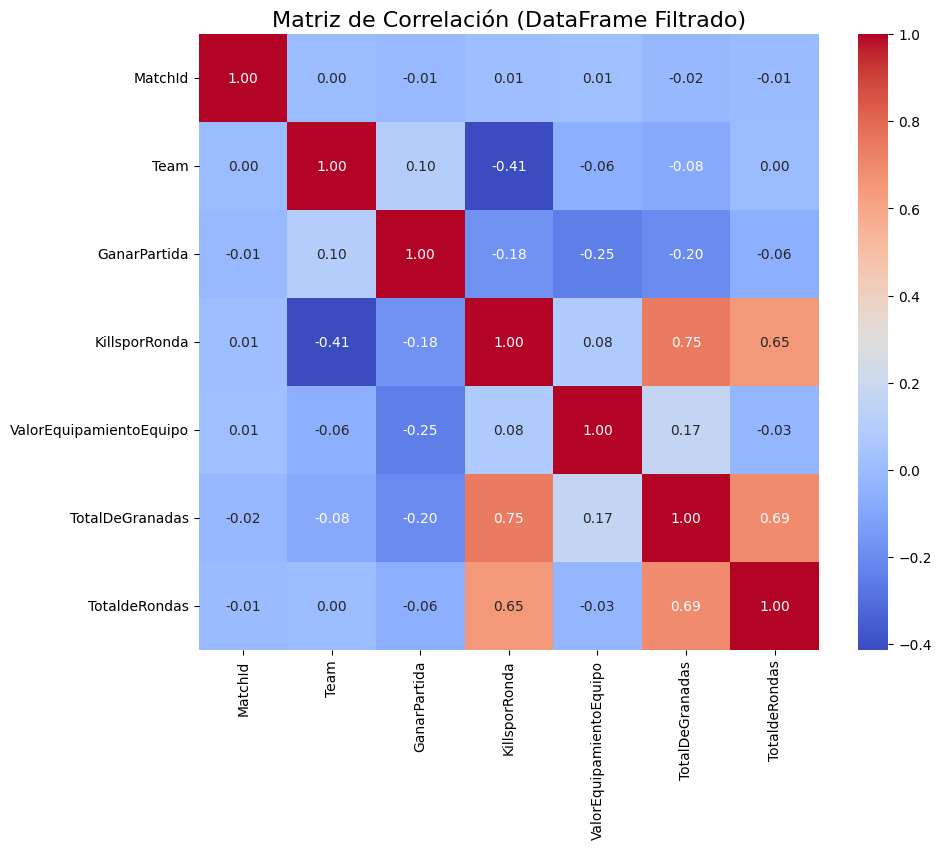

In [86]:


# Calcular la matriz de correlación para el DataFrame 'filtrado'
correlacion_filtrado = filtrado.select_dtypes(include=['number']).corr()

# Imprimir la matriz de correlación
print("\nMatriz de Correlación del DataFrame Filtrado:")
print(correlacion_filtrado)

# Crear el gráfico de calor de la matriz de correlación del DataFrame 'filtrado'
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_filtrado, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (DataFrame Filtrado)", fontsize=16)
plt.show()


# FASE 4 MODELING


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
#CREACION MODELO REGRESION MULTIPLE

In [89]:
X = filtrado[['TotaldeRondas', 'TotalDeGranadas']]  # Variables independientes
y = filtrado['KillsporRonda']                      # Variable dependiente


In [90]:
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [92]:
Y_pred = modelo.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


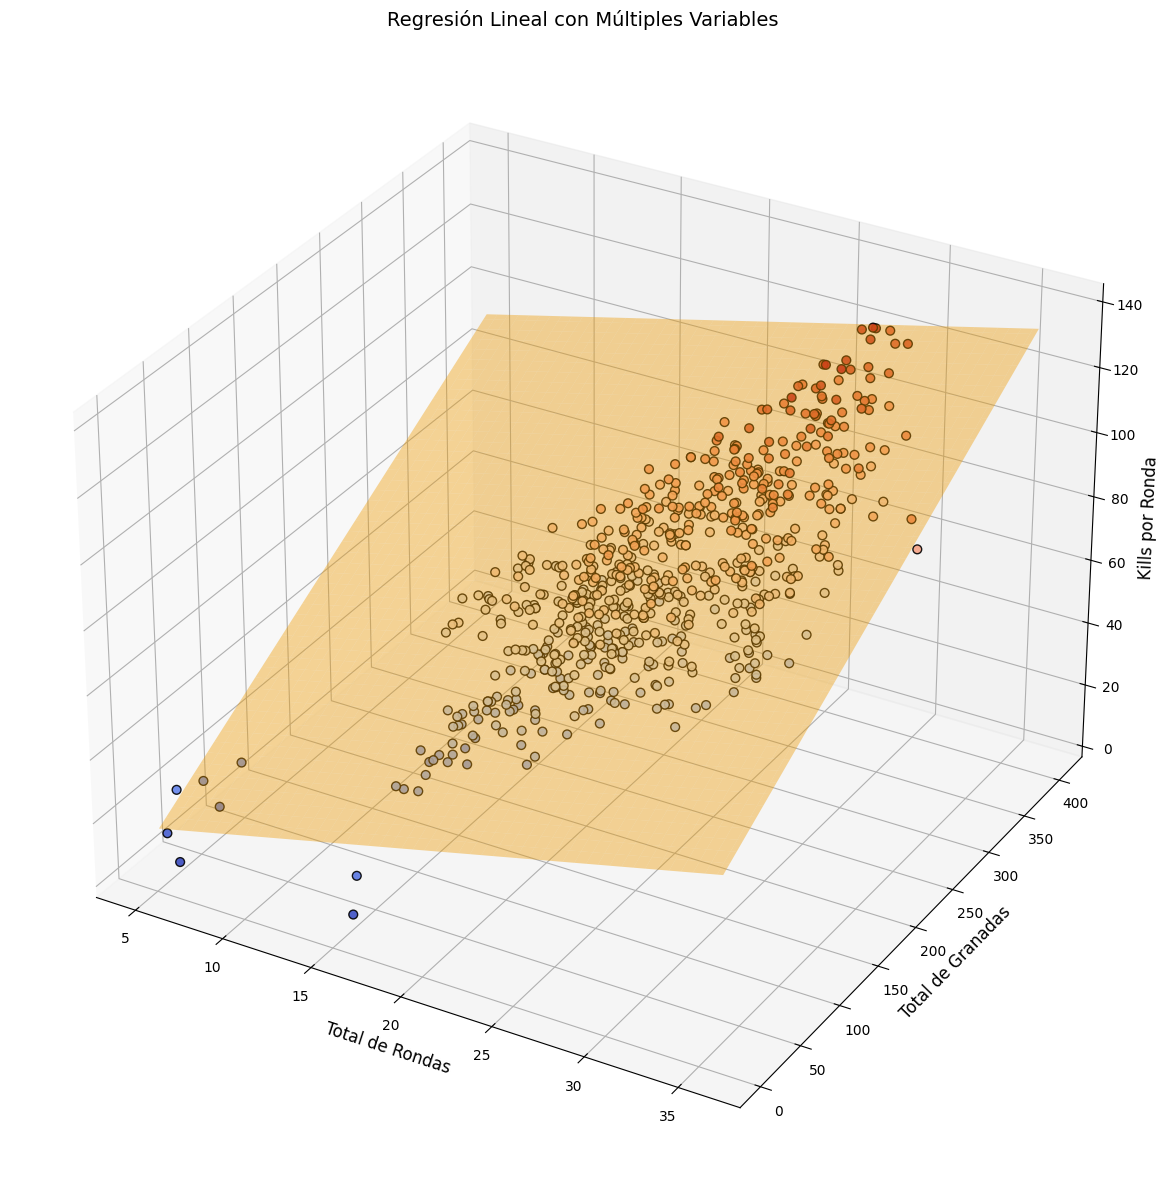

In [93]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
scatter = ax.scatter(
    X['TotaldeRondas'], X['TotalDeGranadas'], y,
    c=y, cmap='coolwarm', s=40, edgecolor='k', alpha=0.9
)

# Plano del modelo
x_surf, y_surf = np.meshgrid(
    np.linspace(X['TotaldeRondas'].min(), X['TotaldeRondas'].max(), 100),
    np.linspace(X['TotalDeGranadas'].min(), X['TotalDeGranadas'].max(), 100)
)
z_surf = modelo.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='orange', alpha=0.4)

# Etiquetas
ax.set_xlabel('Total de Rondas', fontsize=12)
ax.set_ylabel('Total de Granadas', fontsize=12)
ax.set_zlabel('Kills por Ronda', fontsize=12)
ax.set_title('Regresión Lineal con Múltiples Variables', fontsize=14)

plt.tight_layout()
plt.show()


In [94]:
#modelo para predecir la cantidad de kills por ronda (KillsporRonda) en función del total de
#rondas jugadas y el total de granadas lanzadas/no lanzadas.
# Azul → Valores más bajos de KillsporRonda
# Rojo → Valores más altos de KillsporRonda

In [95]:
#REGRESION  La cantidad de kills por ronda (RoundKills) que tendrá
#un jugador basada en sus estadísticas de desempeño, equipamiento
x = filtrado.drop(['KillsporRonda'], axis=1)
x.head()

MatchId  Team  GanarPartida  ValorEquipamientoEquipo  TotalDeGranadas  \
0        4   0.0             0                     3750              244   
1        4   1.0             1                     4400              164   
2        6   0.0             0                    25400                4   
3        6   1.0             1                     9000                9   
4        9   0.0             1                     4100              266   

   TotaldeRondas  
0             23  
1             23  
2             16  
3             16  
4             25

In [96]:
y = filtrado['KillsporRonda']
y.head()

0    100
1     50
2      8
3     19
4    101
Name: KillsporRonda, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [99]:
print('Forma de x_train:', x_train.shape)
print('Forma de x_test:', x_test.shape)
print('Forma de y_train:', y_train.shape)
print('Forma de y_test:', y_test.shape)

Forma de x_train: (532, 6)
Forma de x_test: (134, 6)
Forma de y_train: (532,)
Forma de y_test: (134,)


In [100]:
y_pred = model.predict(x_train)

In [101]:
print("R squared of the linear regression on training set: {:.2%}".format(model.score(x_train, y_train)))
print("R squared of the linear regression on test set: {:.2%}".format(model.score(x_test, y_test)))

R squared of the linear regression on training set: 70.80%
R squared of the linear regression on test set: 78.48%


<Axes: xlabel='KillsporRonda'>

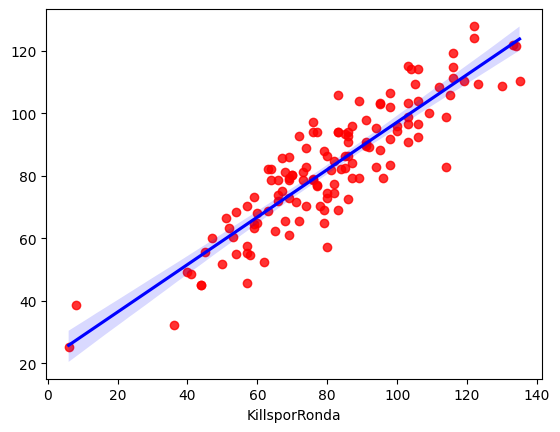

In [102]:
y_pred = model.predict(x_test)
sns.regplot(x=y_test, y=y_pred, color='red', line_kws={"color": "blue"})


In [103]:
#otro modelo un arbol de decision para regresion
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(x_train, y_train)



DecisionTreeRegressor(random_state=42)

<Axes: xlabel='KillsporRonda'>

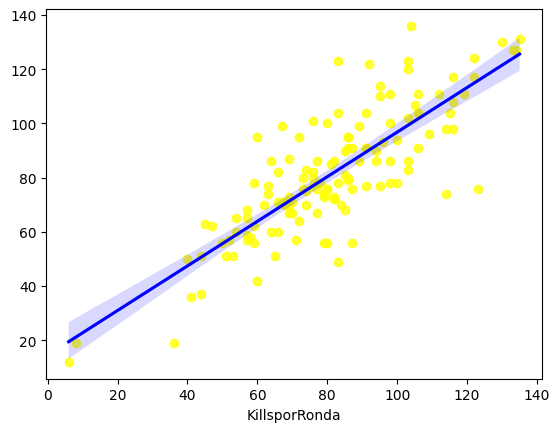

In [104]:
y_pred1 = tree.predict(x_test)
sns.regplot(x=y_test, y=y_pred1, color='yellow', line_kws={"color": "blue"})

In [105]:
print("R squared of the decision tree regressor on training set: {:.2%}".format(tree.score(x_train, y_train)))
print("R squared of the decision tree regressor on test set: {:.2%}".format(tree.score(x_test, y_test)))

R squared of the decision tree regressor on training set: 100.00%
R squared of the decision tree regressor on test set: 63.78%


In [106]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [107]:
y_pred2 = forest.predict(x_test)

In [108]:
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(forest.score(x_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(forest.score(x_test, y_test)))


R squared of the Random Forest Regressor on training set: 95.77%
R squared of the Random Forest Regressor on test set: 78.63%


<Axes: xlabel='KillsporRonda'>

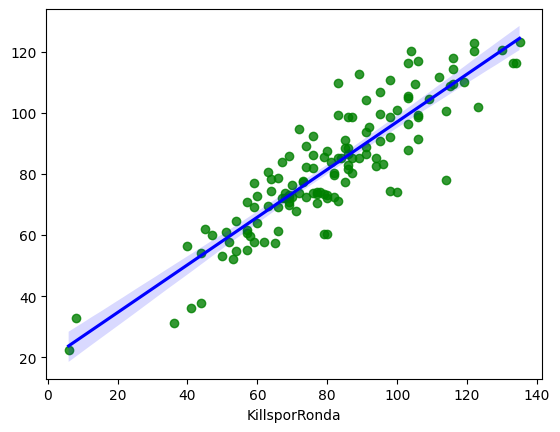

In [109]:
y_pred2 = forest.predict(x_test)
sns.regplot(x=y_test, y=y_pred2, color='green', line_kws={"color": "blue"})

# FASE 5 evaluation

In [110]:
#evaluando el modelo de regresion multiple
d = {"true": Y_test, "predicted": Y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

true   predicted       diff
613    71   79.969776   8.969776
158    91   92.369224   1.369224
633    45   62.858001  17.858001
235    80   81.084023   1.084023
509    76  104.157216  28.157216
..    ...         ...        ...
535    87   87.101746   0.101746
417    44   52.604563   8.604563
465    80   64.865223 -15.134777
211    86  101.122174  15.122174
18     91   82.198270  -8.801730

[134 rows x 3 columns]

In [111]:
from sklearn.metrics import mean_absolute_error
print("coeficiente de determinacion",r2_score(Y_test, Y_pred))
print("MAE es {:.2f}".format(mean_absolute_error(Y_test, Y_pred)))
print("MSE es {:.2f}".format(mean_squared_error(Y_test, Y_pred)))
print("RMSE es",np.sqrt(mean_squared_error(Y_test, Y_pred)))

coeficiente de determinacion 0.6303026951993542
MAE es 11.59
MSE es 200.43
RMSE es 14.15726575534403


In [112]:
#evaluando el modelo de regresion lineal  analizando las diferencias entre las predicciones del modelo y los valores reales
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

true  predicted       diff
613    71  71.628575   0.628575
158    91  97.991829   6.991829
633    45  55.504822  10.504822
235    80  72.755760  -7.244240
509    76  97.122697  21.122697
..    ...        ...        ...
535    87  79.361909  -7.638091
417    44  45.099391   1.099391
465    80  57.152060 -22.847940
211    86  92.896915   6.896915
18     91  89.462559  -1.537441

[134 rows x 3 columns]

In [113]:
from sklearn.metrics import mean_absolute_error
print("coeficiente de determinacion",r2_score(y_test, y_pred))
print("MAE es {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("MSE es {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("RMSE es",np.sqrt(mean_squared_error(y_test, y_pred)))
# EL MEJOR MODELO ES ESTE EL LINEAL SIMPLE

coeficiente de determinacion 0.7847787583388106
MAE es 8.75
MSE es 116.68
RMSE es 10.801866577159904


In [114]:
# evaluando el modelo de arbol de decision de regresion
d = {"true": y_test, "predicted": y_pred1}
df_eval = pd.DataFrame(data=d)
df_eval["diff"] = df_eval["predicted"]-df_eval["true"]
df_eval

true  predicted  diff
613    71       57.0 -14.0
158    91      104.0  13.0
633    45       63.0  18.0
235    80      100.0  20.0
509    76       80.0   4.0
..    ...        ...   ...
535    87       56.0 -31.0
417    44       37.0  -7.0
465    80       56.0 -24.0
211    86       95.0   9.0
18     91       91.0   0.0

[134 rows x 3 columns]

In [115]:
from sklearn.metrics import mean_absolute_error
print("coeficiente de determinacion",r2_score(y_test, y_pred1))
print("MAE es {:.2f}".format(mean_absolute_error(y_test, y_pred1)))
print("MSE es {:.2f}".format(mean_squared_error(y_test, y_pred1)))
print("RMSE es",np.sqrt(mean_squared_error(y_test, y_pred1)))

coeficiente de determinacion 0.6378236633959236
MAE es 10.37
MSE es 196.35
RMSE es 14.01252105328148


In [116]:
# evaluar el modelo de RANDOMFOREST
d = {"true": y_test, "predicted": y_pred2}
df_eval = pd.DataFrame(data=d)
df_eval["diff"] = df_eval["predicted"]-df_eval["true"]
df_eval

true  predicted   diff
613    71      67.86  -3.14
158    91     104.27  13.27
633    45      61.93  16.93
235    80      72.21  -7.79
509    76      86.16  10.16
..    ...        ...    ...
535    87      80.34  -6.66
417    44      37.67  -6.33
465    80      60.46 -19.54
211    86      98.63  12.63
18     91      93.58   2.58

[134 rows x 3 columns]

In [117]:
print("coeficiente de determinacion",r2_score(y_test, y_pred2))
print("MAE es {:.2f}".format(mean_absolute_error(y_test, y_pred2)))
print("MSE es {:.2f}".format(mean_squared_error(y_test, y_pred2)))
print("RMSE es",np.sqrt(mean_squared_error(y_test, y_pred2)))

coeficiente de determinacion 0.7863391378810356
MAE es 8.38
MSE es 115.83
RMSE es 10.762637937473059


In [118]:
terceraprueba = filtrado
terceraprueba

MatchId  Team  GanarPartida  KillsporRonda  ValorEquipamientoEquipo  \
0          4   0.0             0            100                     3750   
1          4   1.0             1             50                     4400   
2          6   0.0             0              8                    25400   
3          6   1.0             1             19                     9000   
4          9   0.0             1            101                     4100   
..       ...   ...           ...            ...                      ...   
661      509   1.0             1            114                     4450   
662      510   0.0             0            122                     3550   
663      510   1.0             0             71                     4350   
664      511   0.0             0             23                     4100   
665      511   1.0             1             12                     3550   

     TotalDeGranadas  TotaldeRondas  
0                244             23  
1                164             23  
2                  4             16  
3                  9             16  
4                266             25  
..               ...            ...  
661              243             27  
662              353             30  
663              273             30  
664               25              5  
665               13              5  

[666 rows x 7 columns]

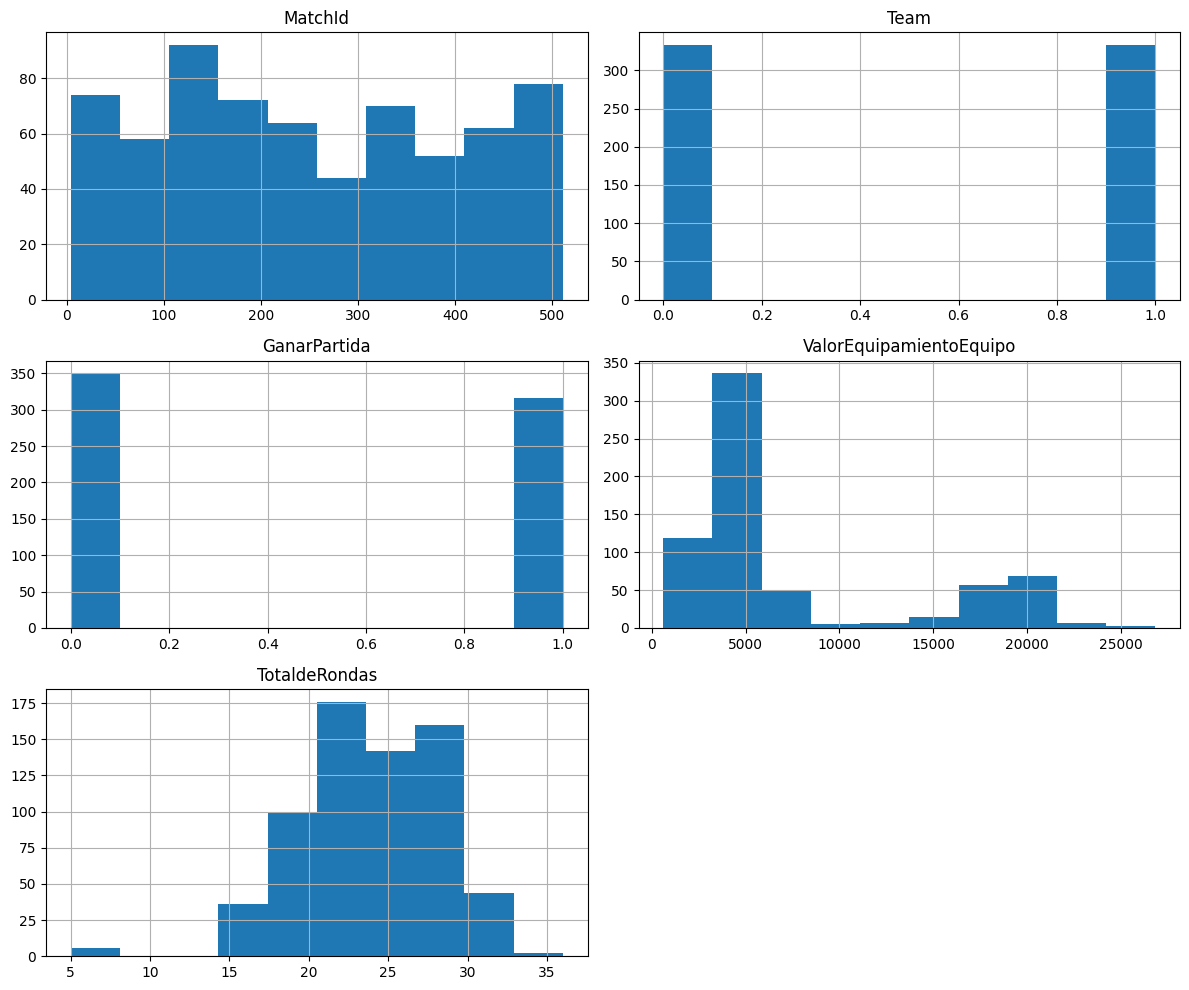

In [119]:


data_frame_filtrado = terceraprueba.drop(['TotalDeGranadas', 'KillsporRonda'], axis=1)
data_frame_filtrado.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


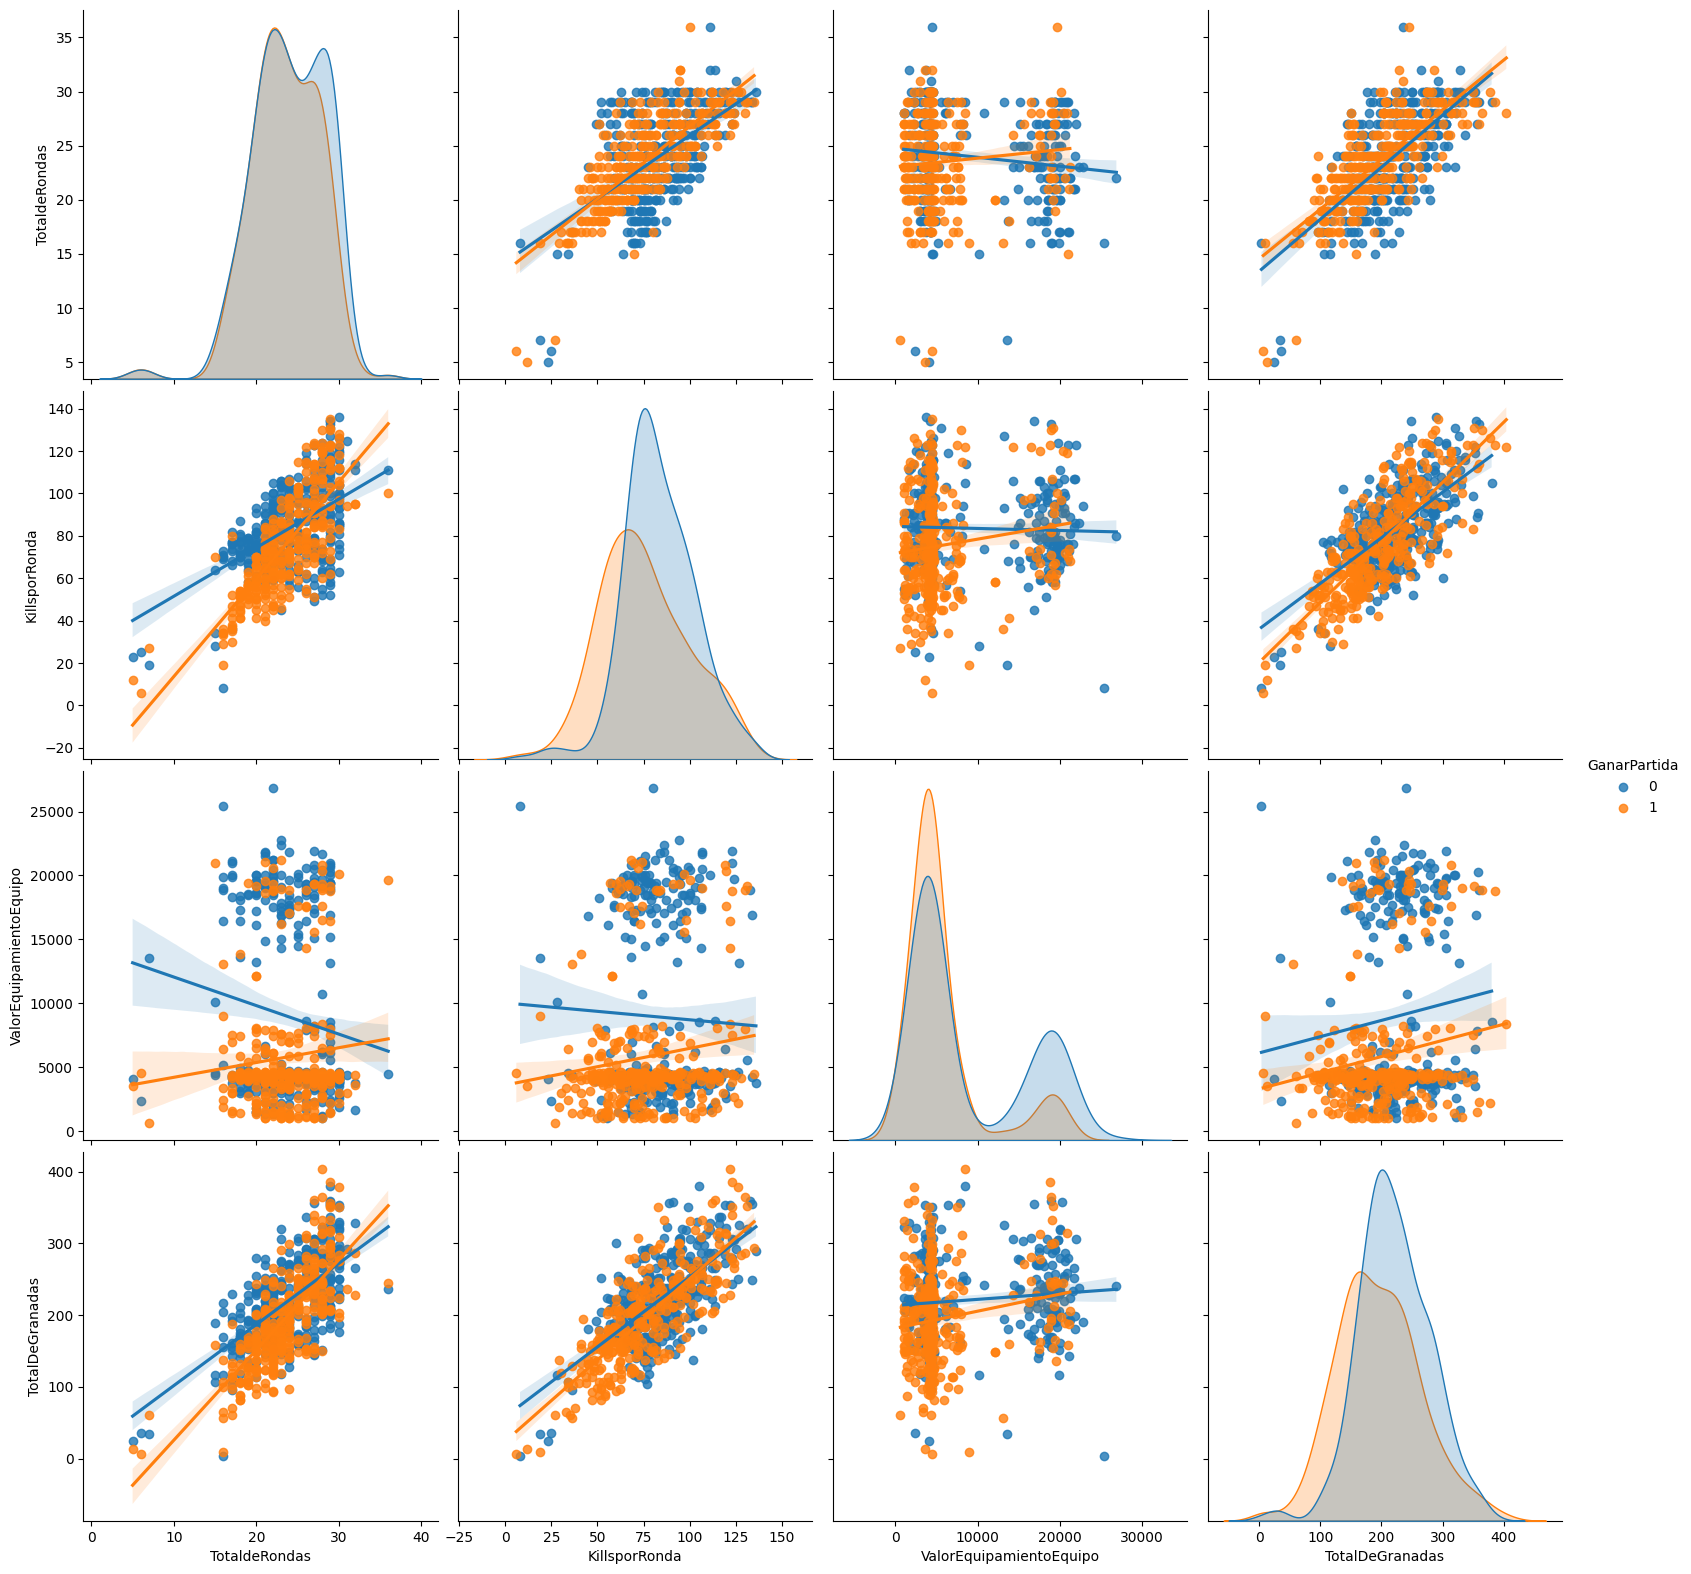

In [120]:
sns.pairplot(terceraprueba.dropna(), hue='GanarPartida', size=4, vars=['TotaldeRondas','KillsporRonda','ValorEquipamientoEquipo','TotalDeGranadas'], kind='reg')

In [121]:
#partidas ganadas de los datos filtrados ej killsporRondas aun que no hayan ganado no significa que la victoria sea suya, que tengan mas kills no significa que la victoria sea suya.


In [122]:
ArbolDC = filtrado[['ValorEquipamientoEquipo','TotaldeRondas', 'KillsporRonda', 'GanarPartida']]
ArbolDC

ValorEquipamientoEquipo  TotaldeRondas  KillsporRonda  GanarPartida
0                       3750             23            100             0
1                       4400             23             50             1
2                      25400             16              8             0
3                       9000             16             19             1
4                       4100             25            101             1
..                       ...            ...            ...           ...
661                     4450             27            114             1
662                     3550             30            122             0
663                     4350             30             71             0
664                     4100              5             23             0
665                     3550              5             12             1

[666 rows x 4 columns]

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x = ArbolDC[['ValorEquipamientoEquipo','TotaldeRondas', 'KillsporRonda']]
y = ArbolDC.GanarPartida
#separar los datos de train en entrenamiento y prueba para probar el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
modelo = DecisionTreeRegressor(max_depth = 4, random_state = 42)
modelo.fit(x_train, y_train)
#validacion del modelo
Y_pred = modelo.predict(x_test)
#evaluacion del modelo
print('precision del modelo en entrenamiento :', modelo.score(x_train, y_train))
print('precision del modelo en validacion :', modelo.score(x_test, y_test))

precision del modelo en entrenamiento : 0.32796586228746116
precision del modelo en validacion : 0.10735760655190574


precision del modelo en entrenamiento : 0.32796586228746116
precision del modelo en validacion : 0.10735760655190574
profundidad del arbol: 4
numero de nodos terminales: 14


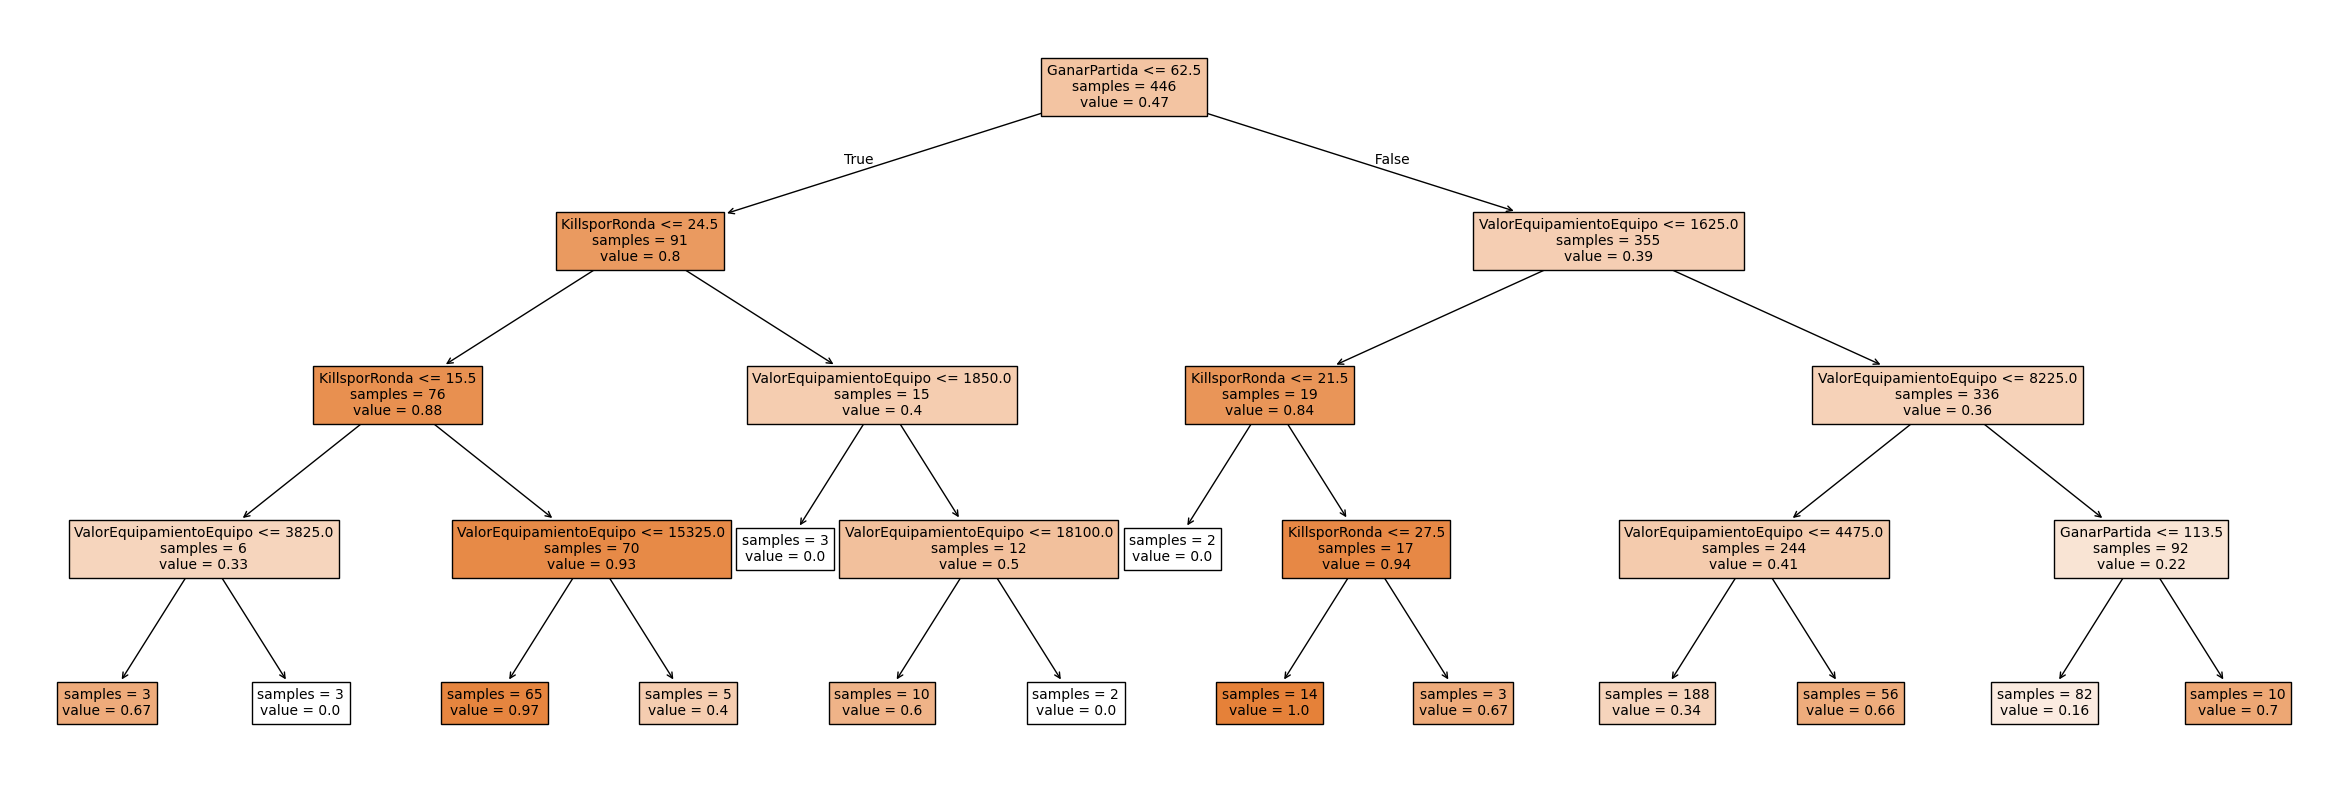

In [124]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#evaluacion del modelo
print('precision del modelo en entrenamiento :', modelo.score(x_train, y_train))
print('precision del modelo en validacion :', modelo.score(x_test, y_test))
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))
print(f"profundidad del arbol: {modelo.get_depth()}")
print(f"numero de nodos terminales: {modelo.get_n_leaves()}")
plot = plot_tree(
    decision_tree = modelo,
    feature_names = ArbolDC.drop(columns=["TotaldeRondas"]).columns.tolist(),
    class_names = ["Perdio", "Gano"],
    filled = True,
    impurity= False,
    fontsize = 10,
    precision = 2,
    ax = ax
)
plt.show()


In [125]:
#este arbol de desicion habla sobre las partidas ganadas por el valordelequipamiento como se observa las que estan
#con menos colores son las que tienen mas probabilidades de que no ganen ya que tiene poco dinero para comprar

In [126]:
# el árbol ayuda a predecir la probabilidad de ganar la partida según:
#Cuántas kills haces por ronda.
#Cuánto dinero tienes al inicio.
#Cuántas rondas se juegan.

# *predecir* si un jugador sobrevive o no en una ronda de Counter-Strike; Survived.

In [127]:

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RANDOM_STATE = 42
DATA_PATH = Path("ET_demo_round_traces_2022.csv")
TARGET_COL = "Survived"

# 1) Cargar y limpiar
df = pd.read_csv(DATA_PATH, delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

df = df[df[TARGET_COL].isin([True, False, 'True', 'False'])]
df[TARGET_COL] = df[TARGET_COL].map({True:1, False:0, 'True':1, 'False':0})

def clean_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(".", "", regex=False), errors="coerce")

skip_object = ["Map", "Team", "MatchWinner", "RoundWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip_object + [TARGET_COL]:
        df[col] = clean_numeric(df[col])

df[df.select_dtypes("bool").columns] = df.select_dtypes("bool").astype(int)

y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL, "MatchWinner", "RoundWinner"])

cat_features = X.select_dtypes("object").columns.tolist()
num_features = X.select_dtypes(exclude="object").columns.tolist()

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categoric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_features),
    ("cat", categoric_pipe, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)
print("Datos preparados. Ahora ejecuta las celdas 1-5 según el modelo.")


/tmp/ipython-input-127-3951962376.py:17: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH, delimiter=";")


Datos preparados. Ahora ejecuta las celdas 1-5 según el modelo.


#LogisticRegression


In [128]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000, random_state=42)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== Logistic Regression ===
Accuracy: 0.6774633653360282
Matriz de confusión:
 [[9747 2057]
 [4326 3660]]
Reporte:
               precision    recall  f1-score   support

           0      0.693     0.826     0.753     11804
           1      0.640     0.458     0.534      7986

    accuracy                          0.677     19790
   macro avg      0.666     0.642     0.644     19790
weighted avg      0.671     0.677     0.665     19790



# DecisionTreeClassifier

In [129]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=42)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== Decision Tree ===
Accuracy: 0.6449722081859525
Matriz de confusión:
 [[8168 3636]
 [3390 4596]]
Reporte:
               precision    recall  f1-score   support

           0      0.707     0.692     0.699     11804
           1      0.558     0.576     0.567      7986

    accuracy                          0.645     19790
   macro avg      0.633     0.634     0.633     19790
weighted avg      0.647     0.645     0.646     19790



#RandomForestClassifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== Random Forest ===
Accuracy: 0.7265790803436079
Matriz de confusión:
 [[9504 2300]
 [3111 4875]]
Reporte:
               precision    recall  f1-score   support

           0      0.753     0.805     0.778     11804
           1      0.679     0.610     0.643      7986

    accuracy                          0.727     19790
   macro avg      0.716     0.708     0.711     19790
weighted avg      0.724     0.727     0.724     19790



#KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== K-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== K-Nearest Neighbors ===
Accuracy: 0.6531076301162203
Matriz de confusión:
 [[8969 2835]
 [4030 3956]]
Reporte:
               precision    recall  f1-score   support

           0      0.690     0.760     0.723     11804
           1      0.583     0.495     0.535      7986

    accuracy                          0.653     19790
   macro avg      0.636     0.628     0.629     19790
weighted avg      0.647     0.653     0.647     19790



#SVM

In [ ]:
from sklearn.svm import SVC

modelo = SVC(kernel="rbf", probability=True, random_state=42)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== SVM (RBF Kernel) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))

# Curva ROC random-forest

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


modelo = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf", modelo)
])

pipe.fit(X_train, y_train)

# Obtener probabilidades para la clase positiva (Survived = 1)
y_score = pipe.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Modelo aleatorio (AUC = 0.5)")
plt.title("Curva ROC – Random Forest")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR / Recall)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# grafico comparacion Acuarcy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de accuracy por modelo
data = {
    "Modelo": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM (RBF)",
        "KNN"
    ],
    "Accuracy": [
        0.6775,
        0.6450,
        0.7266,
        0.6902,
        0.6531
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df["Modelo"], df["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy entre Modelos de Clasificación")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Rango de 0 a 1 para claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Modelo de clasificación la curva ROC-AUC mejorado

In [ ]:


import pandas as pd, numpy as np, joblib, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ---------- 1. Cargar y limpiar ----------
df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

df = df[df["Survived"].isin([True, False, 'True', 'False'])]
df["Survived"] = df["Survived"].map({True:1, False:0, 'True':1, 'False':0})

def clean(s):
    return pd.to_numeric(s.astype(str).str.replace(".","",regex=False), errors="coerce")

skip = ["Map","Team","MatchWinner","RoundWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip+["Survived"]:
        df[col] = clean(df[col])

df[df.select_dtypes("bool").columns] = df.select_dtypes("bool").astype(int)

y = df["Survived"]
X = df.drop(columns=["Survived","MatchWinner","RoundWinner"])

cat_cols = X.select_dtypes("object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

prep = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# ---------- 2. Pipeline (prep ➜ SMOTE ➜ modelo) ----------
pipe = ImbPipeline(steps=[
    ("prep", prep),
    ("smote", SMOTE(random_state=42, k_neighbors=5)),
    ("model", GradientBoostingClassifier(
        n_estimators=600,        # ↑ capacidad
        learning_rate=0.04,      # paso moderado
        max_depth=4,             # árboles más profundos
        subsample=0.9,           # regulariza
        random_state=42))
])

# ---------- 3. Train/Test ----------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

pipe.fit(X_tr, y_tr)

# ---------- 4. Evaluación ----------
y_prob = pipe.predict_proba(X_te)[:,1]
y_pred = (y_prob >= 0.5).astype(int)

auc  = roc_auc_score(y_te, y_prob)
acc  = accuracy_score(y_te, y_pred)

print(f"AUC  : {auc:.3f}")
print(f"Acc  : {acc:.3f}\n")
print(classification_report(y_te, y_pred, digits=3))

# Curva ROC
fpr, tpr, _ = roc_curve(y_te, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"SMOTE + GB (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'k--',label="Aleatorio")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Curva ROC – Modelo ajustado")
plt.legend(); plt.grid(); plt.show()

# ---------- 5. Guardar modelo ----------
joblib.dump(pipe, "/content/clf_survived_AUC>80.joblib")
print("✔️  Modelo guardado en clf_survived_AUC>80.joblib")


In [ ]:
import os

# Listar todos los archivos .joblib del entorno actual
joblib_files = [f for f in os.listdir() if f.endswith(".joblib")]
print(joblib_files)


In [ ]:
import joblib

# Cargar el modelo
clf = joblib.load("clf_survived_AUC>80.joblib")

# Extraer el preprocesador
prep = clf.named_steps["prep"]

# Obtener los nombres de las columnas procesadas
feature_names = prep.get_feature_names_out()
print("El modelo espera estas columnas como entrada:")
for i, name in enumerate(feature_names, 1):
    print(f"{i}. {name}")


#Modelo de regresion mejorado

In [ ]:
# --- 1) Cargar archivo ---
df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

# --- 2) Asegurar que la columna objetivo sea binaria válida ---
TARGET = "Survived"
df = df[df[TARGET].isin([True, False, 'True', 'False', 1, 0])]
df[TARGET] = df[TARGET].map({True: 1, False: 0, 'True': 1, 'False': 0, 1: 1, 0: 0})

# Convertir columnas con valores 'True'/'False' (strings o booleanos) a 1/0
for col in df.columns:
    if df[col].dropna().isin([True, False, 'True', 'False']).all():
        df[col] = df[col].map({True: 1, False: 0, 'True': 1, 'False': 0})


# --- 4) Limpiar columnas numéricas mal formateadas ---
def clean_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(".", "", regex=False), errors="coerce")

skip_object = ["Map", "Team", "MatchWinner", "RoundWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip_object + [TARGET]:
        df[col] = clean_numeric(df[col])

# --- 5) Forzar todas las columnas categóricas a tipo string uniforme ---
for col in df.select_dtypes("object").columns:
    df[col] = df[col].astype(str)

# --- 6) Eliminar filas con NaN en la variable objetivo ---
df = df.dropna(subset=[TARGET]).reset_index(drop=True)


In [ ]:
y = df["Survived"]
X = df.drop(columns=["Survived", "MatchWinner", "RoundWinner"])



In [ ]:
print(df.columns.tolist())


In [ ]:
import joblib

clf = joblib.load("clf_survived_AUC_80.joblib")
prep = clf.named_steps["prep"]              # tu ColumnTransformer
feature_names = prep.get_feature_names_out()  # requiere scikit-learn ≥1.2

print(len(feature_names))   # debería mostrar 26
print(feature_names.tolist())


In [ ]:

import pandas as pd, numpy as np, joblib, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# ---------- 1. Cargar CSV ----------
df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

# ---------- 2. Variable objetivo ----------
TARGET = "TeamStartingEquipmentValue"     # dinero inicial del equipo

# ---------- 3. Limpiar columnas ----------
# 3a) Convertir valores booleanos o 'True'/'False' a 1/0
for col in df.columns:
    if df[col].dropna().isin([True, False, 'True', 'False']).all():
        df[col] = df[col].map({True:1, False:0, 'True':1, 'False':0})

# 3b) Convertir strings con puntos (numéricos mal formateados) a float
def clean_num(s):
    return pd.to_numeric(s.astype(str).str.replace(".","",regex=False), errors="coerce")

skip_obj = ["Map", "Team", "RoundWinner", "MatchWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip_obj:                                   # deja categóricas reales
        df[col] = clean_num(df[col])

# 3c) Forzar todas las columnas categóricas restantes a string puro
for col in df.select_dtypes("object").columns:
    df[col] = df[col].astype(str)

# ---------- 4. Eliminar filas sin target ----------
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

# ---------- 5. Separar X / y ----------
y = df[TARGET].astype(float)
X = df.drop(columns=[TARGET])

cat_cols = X.select_dtypes("object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

# ---------- 6. Preprocesamiento ----------
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc" , StandardScaler())
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])
prep = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# ---------- 7. Modelo ----------
reg = GradientBoostingRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        random_state=42)

pipe = Pipeline([
    ("prep", prep),
    ("model", reg)
])

# ---------- 8. Train / Test ----------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, random_state=42)

pipe.fit(X_tr, y_tr)

# ---------- 9. Evaluación ----------
y_pred = pipe.predict(X_te)
r2  = r2_score(y_te, y_pred)
mae = mean_absolute_error(y_te, y_pred)

print(f"✅ R²  : {r2:.3f}")
print(f"📉 MAE : {mae:,.0f} (dinero)")

# ---------- 10. Guardar modelo ----------
joblib.dump(pipe, "/content/reg_team_equip_R2>80.joblib")
print("Modelo guardado en  reg_team_equip_R2>80.joblib")


# API.PY

In [ ]:
%%writefile api.py
# 👇 Aquí va el contenido completo del archivo
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, conlist
import joblib

clf = joblib.load("clf_survived_AUC_80.joblib")
reg = joblib.load("reg_team_equip_R2_80.joblib")

app = FastAPI()

class ClfInput(BaseModel):
    features: conlist(float, min_items=17, max_items=17)

class RegInput(BaseModel):
    features: conlist(float, min_items=22, max_items=22)

@app.post("/predict/survival")
def predict_survival(data: ClfInput):
    try:
        proba = clf.predict_proba([data.features])[0, 1]
        return {"probability": float(round(proba, 3)), "label": int(proba >= 0.5)}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.post("/predict/equipment_value")
def predict_equipment(data: RegInput):
    try:
        value = reg.predict([data.features])[0]
        return {"equipment_value": float(round(value, 2))}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))
